In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline
import os
import seaborn as sns
import zipfile

In [7]:
zf=zipfile.ZipFile(r"C:\Users\payal2.bhatia\Downloads\train_u5jK80M.zip")

In [8]:
train_data=pd.read_csv(zf.open("train.csv"))

In [9]:
 t=pd.read_csv(zf.open("train.csv"))

In [5]:
# train_data["first_payment_date"]=t["first_payment_date"]
# train_data['origination_date']=t["origination_date"]

In [10]:
Y=train_data[["m13"]]

In [38]:
train_data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [39]:
train_data.shape

(116058, 29)

In [40]:
train_data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [5]:
num_columns=[i for i in train_data.columns if train_data[i].dtype != "object"]

In [6]:
cat_columns=[i for i in train_data.columns if train_data[i].dtype == "object"]

In [7]:
y= train_data["m13"]

###### Checking normality probability plot of target

In [45]:
y.value_counts()

0    115422
1       636
Name: m13, dtype: int64

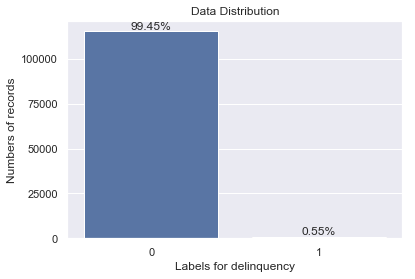

In [46]:
sns.set()
sns.countplot(train_data["m13"]).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/116058 )),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for delinquency")
ax.set_ylabel("Numbers of records")
plt.show()

((array([-4.37859284, -4.18122692, -4.07392819, ...,  4.07392819,
          4.18122692,  4.37859284]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.01568571374713753, 0.005480018611383969, 0.212466226817875))

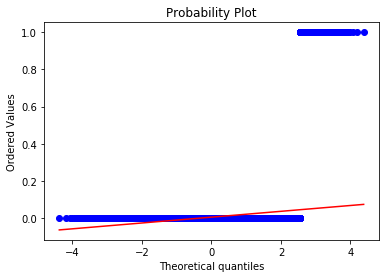

In [8]:
import statsmodels.api as sm
import scipy
from scipy import stats
stats.probplot(y,  plot=sns.mpl.pyplot)


In [48]:
len(train_data["loan_id"].unique())

116058

Descriptive Stats

In [49]:
cat_columns

['source',
 'financial_institution',
 'origination_date',
 'first_payment_date',
 'loan_purpose']

In [50]:
for i in cat_columns:
    print("Unique " , i ,"is", train_data[i].unique() )

Unique  source is ['Z' 'Y' 'X']
Unique  financial_institution is ['Turner, Baldwin and Rhodes' 'Swanson, Newton and Miller'
 'Thornton-Davis' 'OTHER' 'Browning-Hart' 'Richardson Ltd'
 'Edwards-Hoffman' 'Richards-Walters' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Anderson-Taylor'
 'Taylor, Hunt and Rodriguez' 'Nicholson Group' 'Cole, Brooks and Vincent'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Romero, Woods and Johnson' 'Chapman-Mcmahon']
Unique  origination_date is ['2012-03-01' '2012-01-01' '2012-02-01']
Unique  first_payment_date is ['05/2012' '03/2012' '04/2012' '02/2012']
Unique  loan_purpose is ['C86' 'B12' 'A23']


no variable is ordinal

#### Univariate Analysis of Categorical Variables

###### distributions of these variables

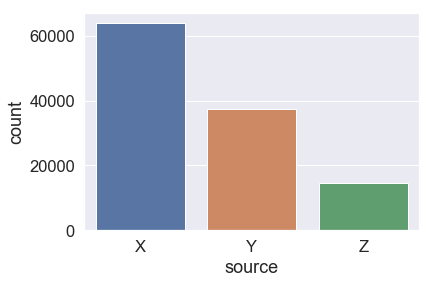

In [51]:
sns.countplot(train_data["source"], order=train_data["source"].value_counts().index)

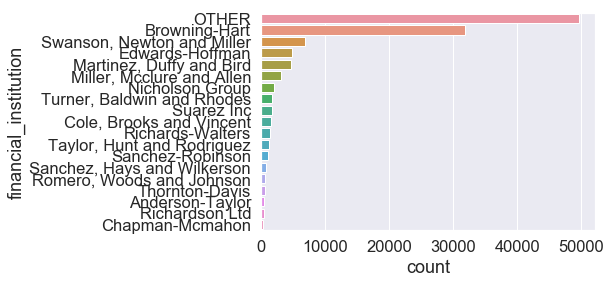

In [52]:
sns.countplot(data=train_data, y=train_data["financial_institution"], order=train_data["financial_institution"].value_counts().index)

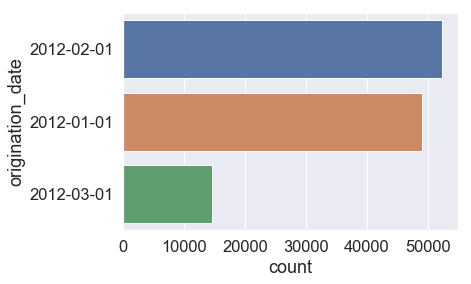

In [53]:
sns.countplot(data=train_data, y=train_data["origination_date"], order=train_data["origination_date"].value_counts().index)

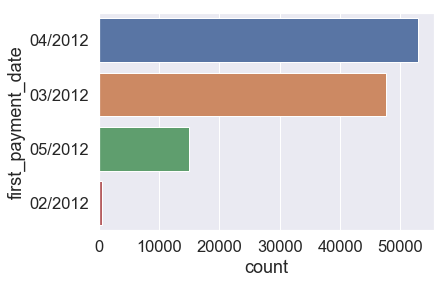

In [54]:
sns.countplot(data=train_data, y=train_data["first_payment_date"], order=train_data["first_payment_date"].value_counts().index)

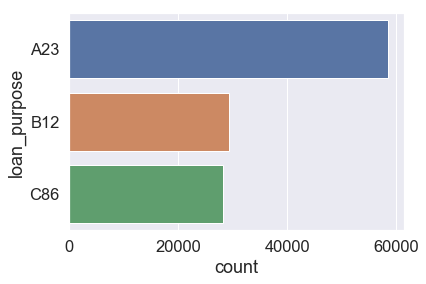

In [55]:
sns.countplot(data=train_data, y=train_data["loan_purpose"], order=train_data["loan_purpose"].value_counts().index)

###### Bivariate Analysis(Categorical varaiables' relation with Target variable)

In [56]:
from seaborn import countplot

In [57]:
for i in cat_columns:
    x=pd.DataFrame(pd.crosstab(train_data[i], y, margins=True))
    x["delinquent/"+str(i)]=x[1]/x["All"]
    print(i, " to target:", x)

source  to target: m13          0    1     All  delinquent/source
source                                        
X        63553  305   63858           0.004776
Y        37307  247   37554           0.006577
Z        14562   84   14646           0.005735
All     115422  636  116058           0.005480
financial_institution  to target: m13                               0    1     All  \
financial_institution                              
Anderson-Taylor                 480    3     483   
Browning-Hart                 31677  175   31852   
Chapman-Mcmahon                 388    0     388   
Cole, Brooks and Vincent       1630   12    1642   
Edwards-Hoffman                4816   41    4857   
Martinez, Duffy and Bird       4692   23    4715   
Miller, Mcclure and Allen      3139   19    3158   
Nicholson Group                2105   11    2116   
OTHER                         49430  269   49699   
Richards-Walters               1454    5    1459   
Richardson Ltd                  472    1 

Observations: 
-- 
    Though source channel x is highest loan origination channel, but delinquency is more attributed by Y>>Z>>X

-- 
    Edwards-Hoffman>>Turner,Baldwin and Rhodes>>Cole,Brooks and Vincent>>Swanson, Newton and Miller>>Anderson-Taylor>>
    Miller, Mcclure and Allen>>Browning-Hart>> OTHER>>Nicholson Group
    
    however, the bank which lends are in following order
    
    'OTHER'>>'Browning-Hart'>> 'Swanson, Newton and Miller'>>'Edwards-Hoffman'>> 'Martinez, Duffy and Bird'>>
       'Miller, Mcclure and Allen'>>'Nicholson Group'>>'Turner, Baldwin and Rhodes'

-- A23 is the highest loan purpose but the delinquency is more seen in the following order:
        
        B12> C86> A23



In [58]:
d=train_data[train_data["m13"]==1][["source", "loan_purpose","origination_date", "first_payment_date", "m13"]]                   

In [59]:
pd.pivot_table(d, index=["origination_date","first_payment_date"], aggfunc=[np.sum], margins=True)

sum
                                     m13
origination_date first_payment_date     
2012-01-01       02/2012               6
                 03/2012             290
                 04/2012               8
2012-02-01       03/2012               6
                 04/2012             267
                 05/2012               6
2012-03-01       04/2012               5
                 05/2012              48
All                                  636

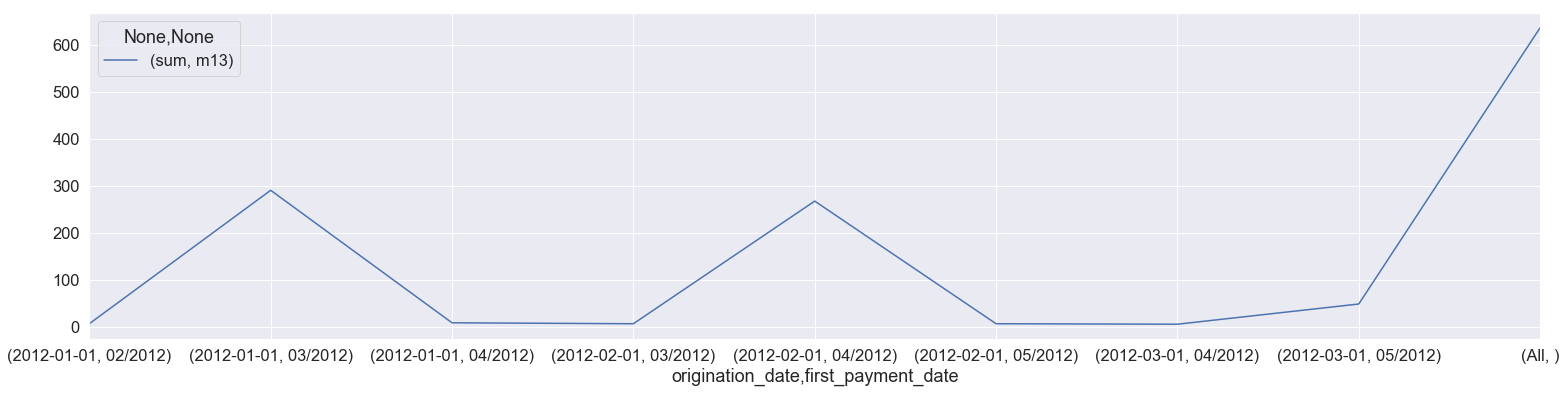

In [61]:
plt.rcParams['figure.figsize'] = (26.0, 6.0)
pd.pivot_table(d, index=["origination_date","first_payment_date"], aggfunc=[np.sum], margins=True).plot()

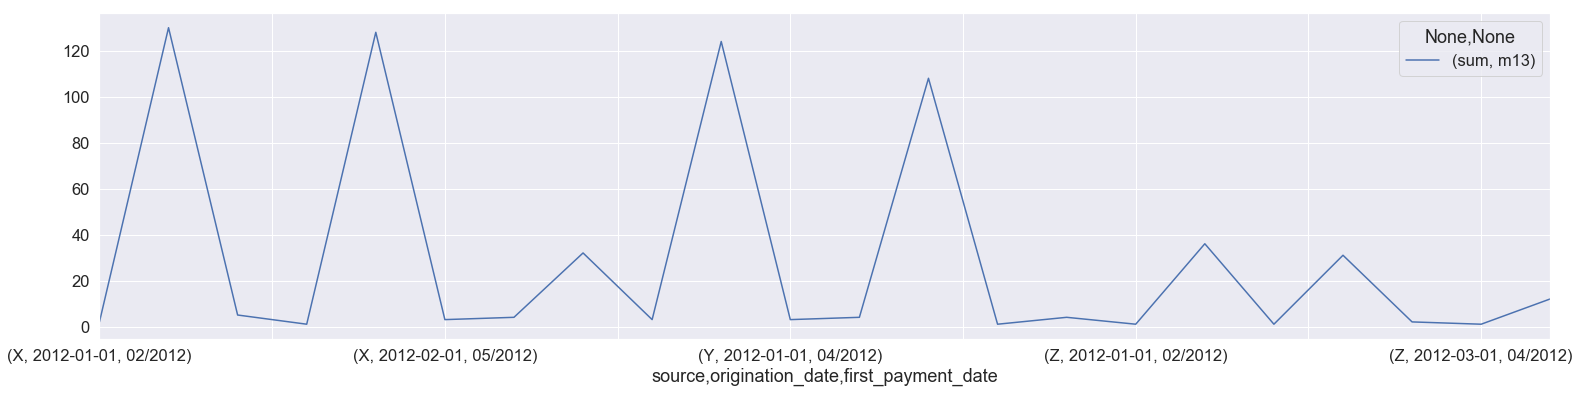

In [62]:
pd.pivot_table(d, index=["source","origination_date","first_payment_date"], aggfunc=[np.sum]).plot()

In [63]:
d.pivot_table(index=["source"], columns=["origination_date","first_payment_date"], aggfunc=np.sum, margins=True)

m13                                             \
origination_date   2012-01-01                 2012-02-01                   
first_payment_date    02/2012 03/2012 04/2012    03/2012 04/2012 05/2012   
source                                                                     
X                         2.0   130.0     5.0        1.0   128.0     3.0   
Y                         3.0   124.0     3.0        4.0   108.0     1.0   
Z                         1.0    36.0     NaN        1.0    31.0     2.0   
All                       6.0   290.0     8.0        6.0   267.0     6.0   

                                            
origination_date   2012-03-01          All  
first_payment_date    04/2012 05/2012       
source                                      
X                         4.0    32.0  305  
Y                         NaN     4.0  247  
Z                         1.0    12.0   84  
All                       5.0    48.0  636

##### ??

#### Numerical Data

In [11]:
num_train_data=train_data.filter(num_columns, axis=1)

NameError: name 'num_columns' is not defined

In [ ]:
num_train_data.drop("m13", inplace=True, axis=1)

In [66]:
num_train_data.shape

(116058, 23)

##### Separating out Monthly data

In [67]:
month_wise_LP=num_train_data.filter(['m1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'])

In [68]:
num_train_data.drop(month_wise_LP.columns, axis=1, inplace=True)

In [69]:
num_train_data.head(4)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0
3,601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0


In [70]:
num_train_data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000


In [71]:
num_train_data.skew()

loan_id                      0.004114
interest_rate                0.051326
unpaid_principal_bal         0.897524
loan_term                   -0.692948
loan_to_value               -0.765251
number_of_borrowers         -0.379397
debt_to_income_ratio        -0.194303
borrower_credit_score       -3.570945
insurance_percent            2.743691
co-borrower_credit_score    -0.362473
insurance_type              17.436825
dtype: float64

In [72]:
num_train_data["m13"]=y

In [73]:
num_train_data.head(2)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m13
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,1
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,1


In [80]:
def plotnum(i):
    sns.distplot(num_train_data[i])
    plt.show()

In [81]:
def boxplot(i):
    sns.boxplot(x=train_data["m13"],y=num_train_data[i], hue=train_data["loan_purpose"])
    plt.show()

In [82]:
def violinpot(i):
    sns.violinplot(x=train_data["m13"],y=num_train_data[i], hue=train_data["loan_purpose"])
    plt.show()
    sns.violinplot(x=train_data["m13"],y=num_train_data[i], hue=train_data["source"])
    plt.show()

#### Univariate Analysis and Bivariate Analysis of Numerical data

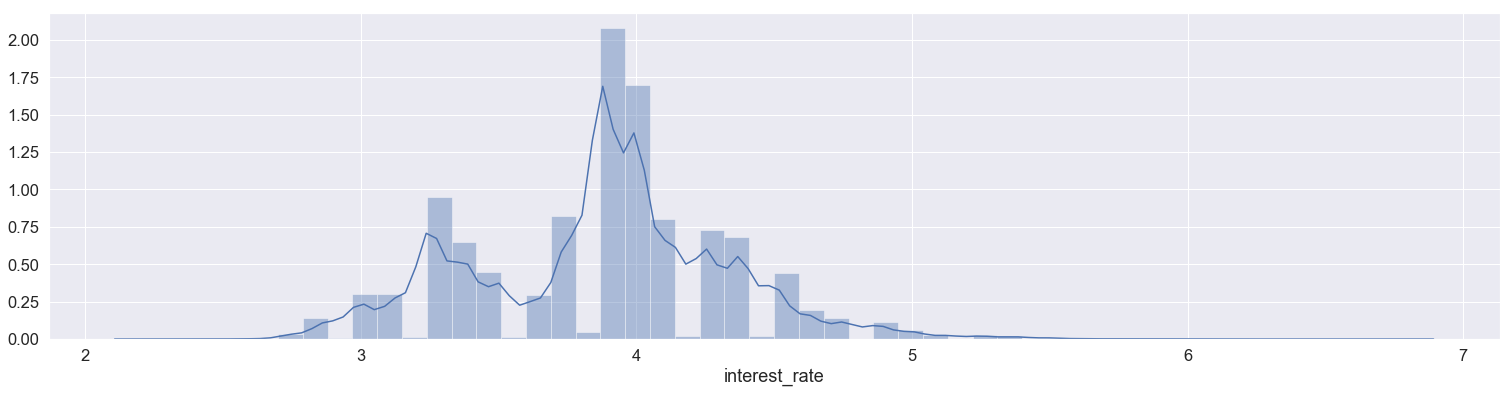

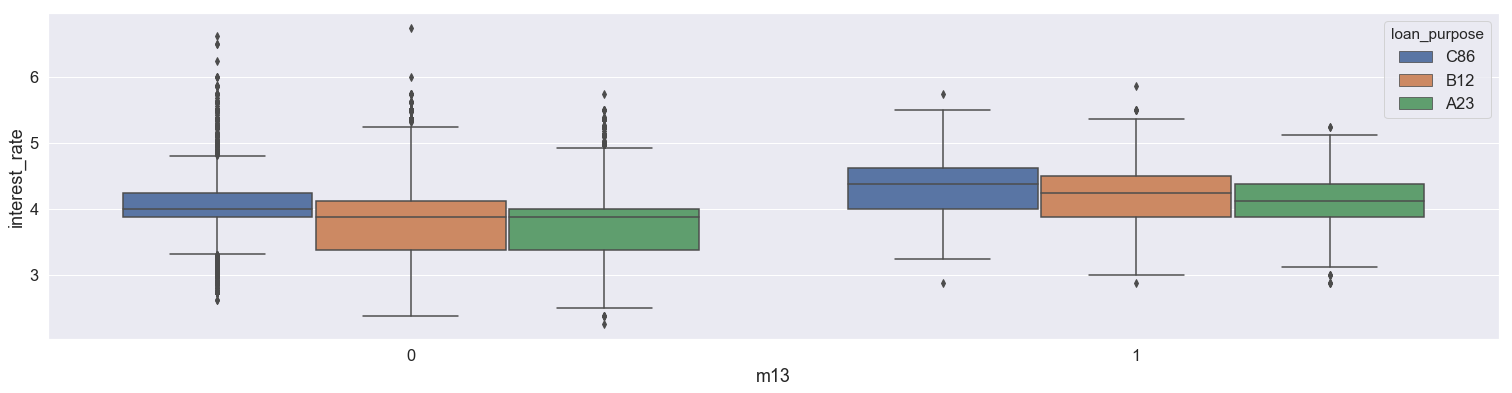

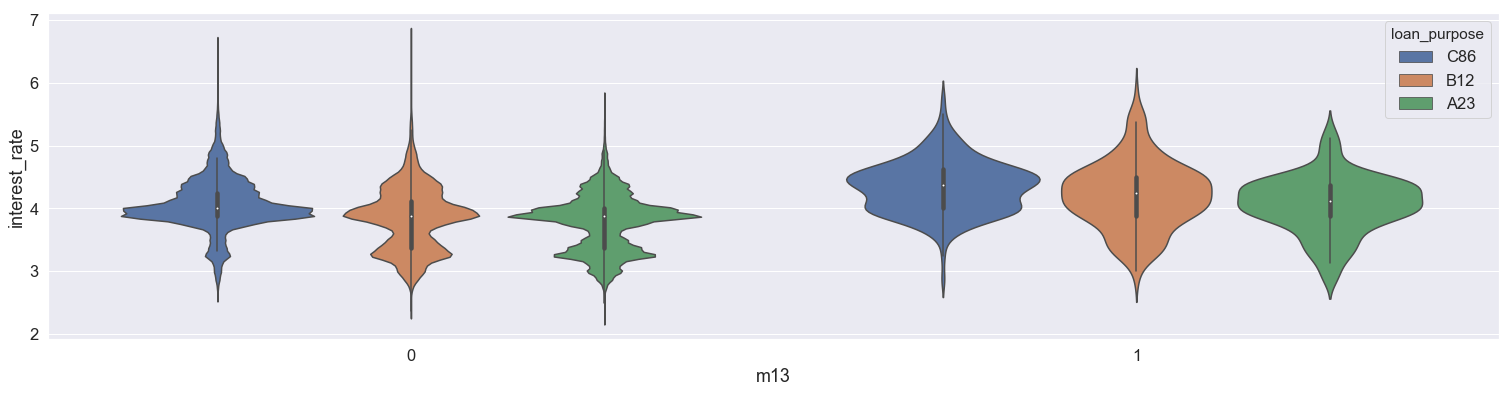

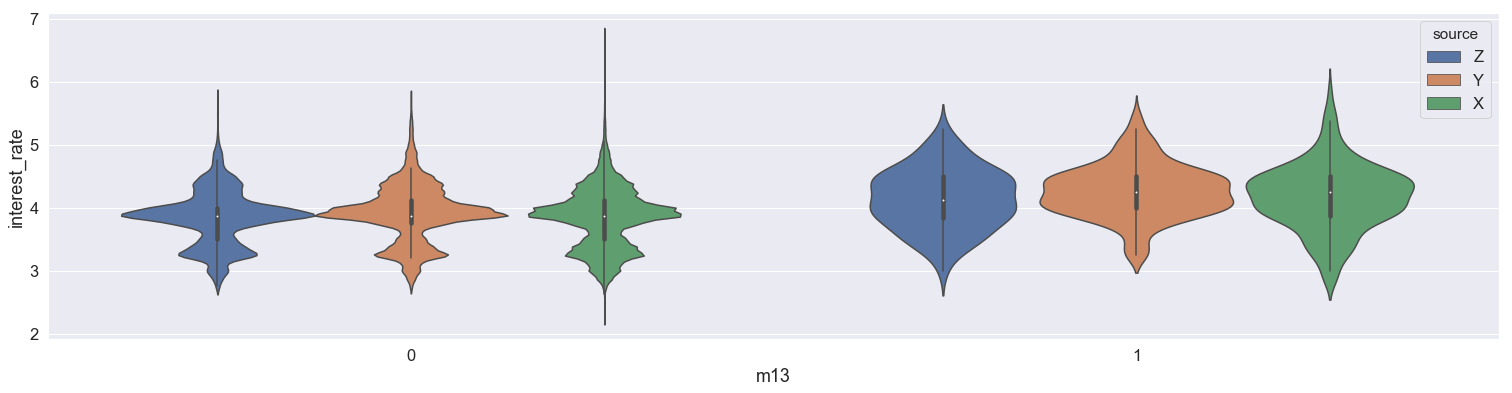

(None, None, None)

In [83]:
plotnum("interest_rate"), boxplot("interest_rate"), violinpot("interest_rate") # Delinquent acounts have higher interest rate

for the same loan purpose  and the same source, delinquent amounts have higher interest rates
Delinquent accounts have normal distribution of interest rates unlike non-delinquent accounts


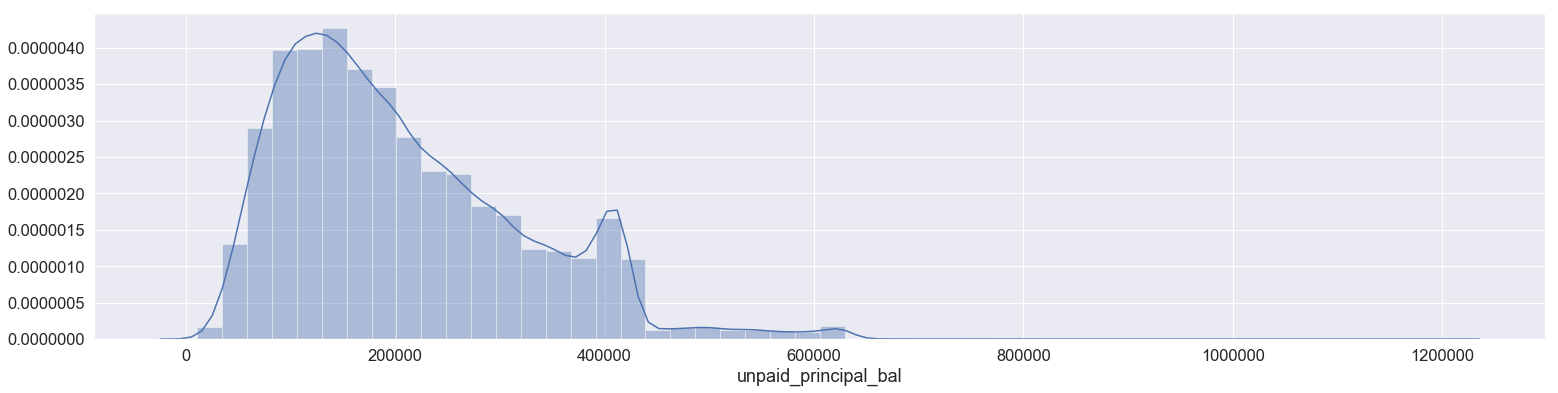

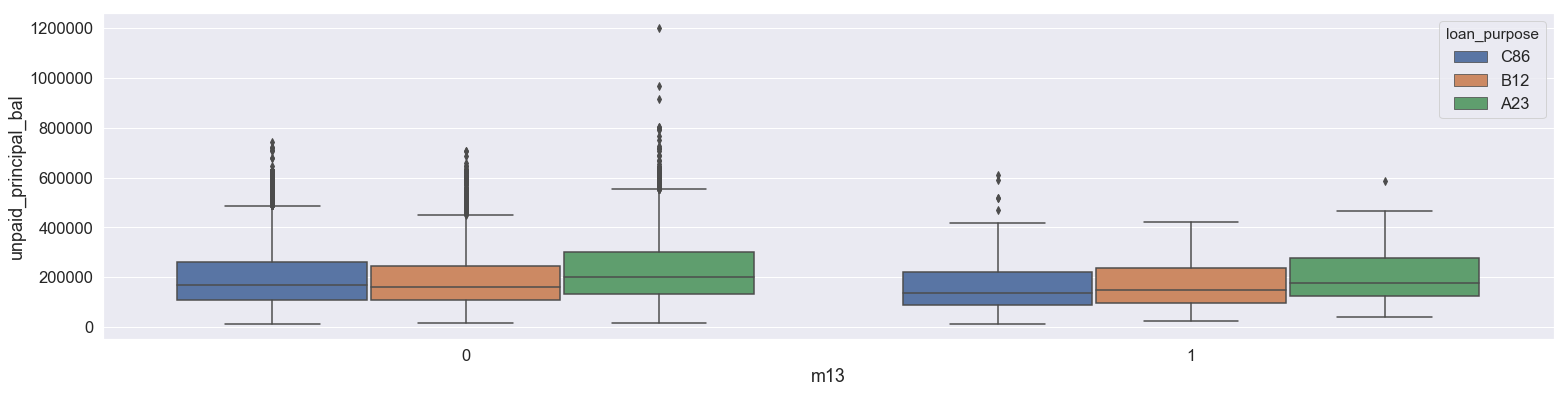

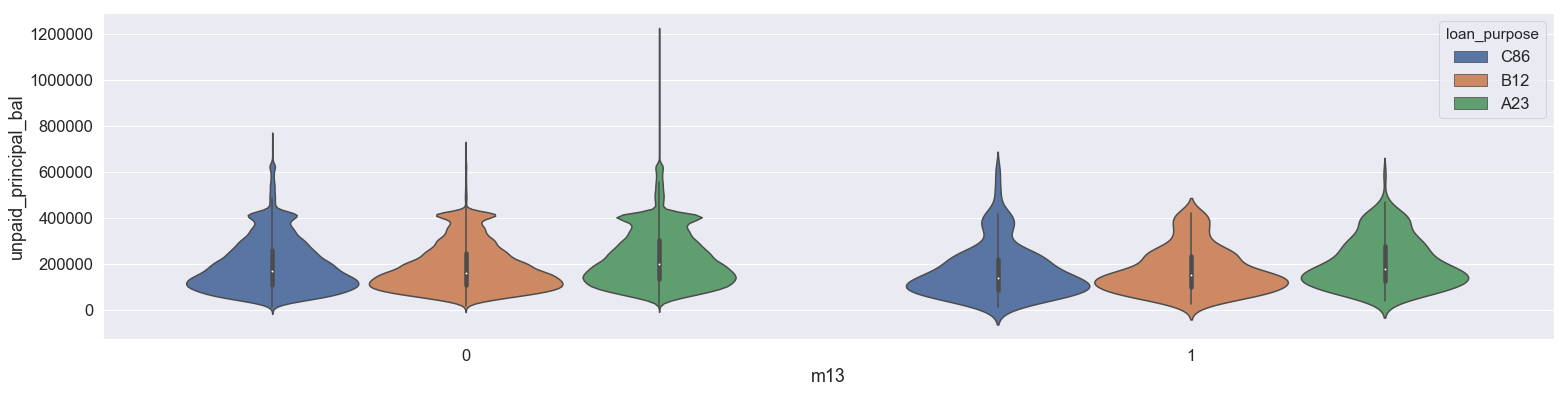

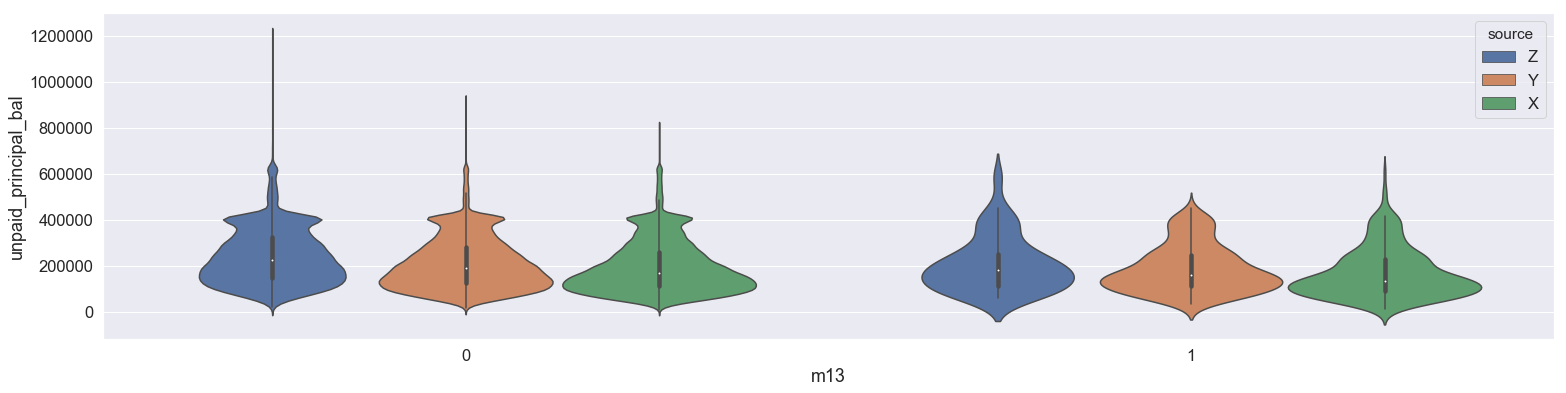

(None, None, None)

In [84]:
plotnum("unpaid_principal_bal"), boxplot("unpaid_principal_bal"), violinpot("unpaid_principal_bal")
# non delinquent accounts have unpaid principal balance
#This balance represents the remaining risk of nonpayment being incurred by the lender. 

Amount for loan purpose c86  high,  so the interest rates and unpaid principle balance are high
there are few delinquent accounts which have high unpaid balance
Highest unpaid principal balance in sourceZ

The lender must review the borrower’s credit history to determine previous
mortgage delinquency, severity (e.g., 30, 60, or 90 days), and recency
of the delinquency. Loans with excessive prior mortgage delinquencies 
are not eligible. Excessive prior mortgage 
delinquency is defined as any mortgage tradeline that has one or more 
60-, 90-, 120-, or 150-day delinquency reported within the 12 months prior to the credit report date

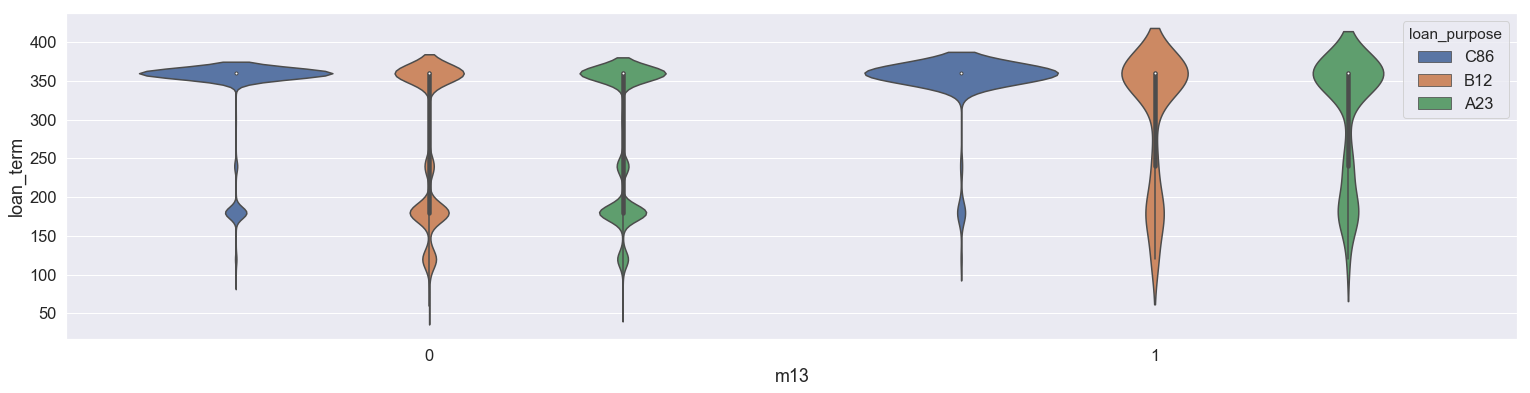

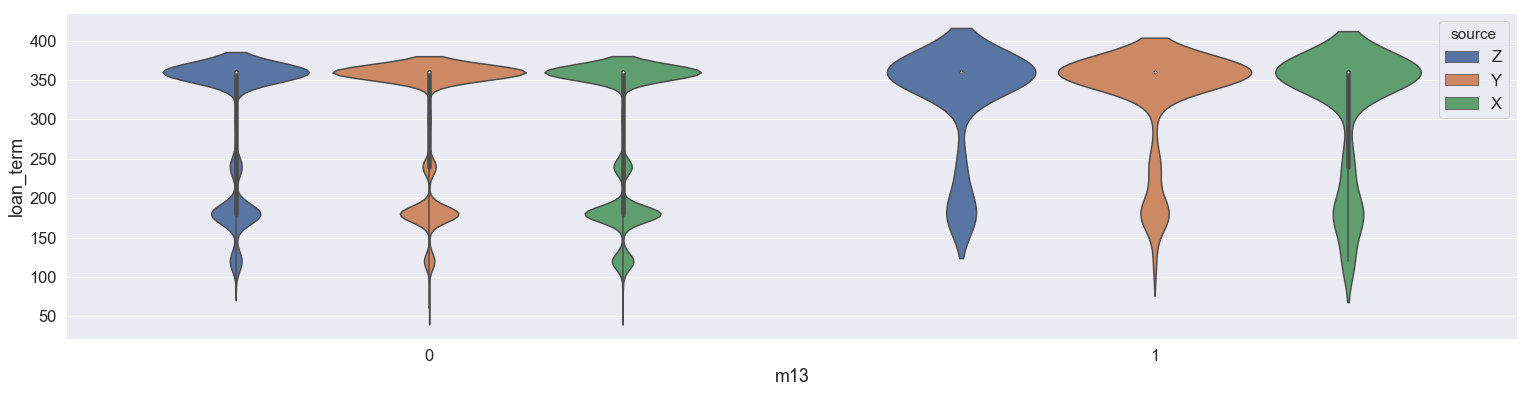

In [85]:
 violinpot("loan_term") 
# there are few accounts which has low loan term, still delinquent
#median is almost same
#  C loans are for an year 
    

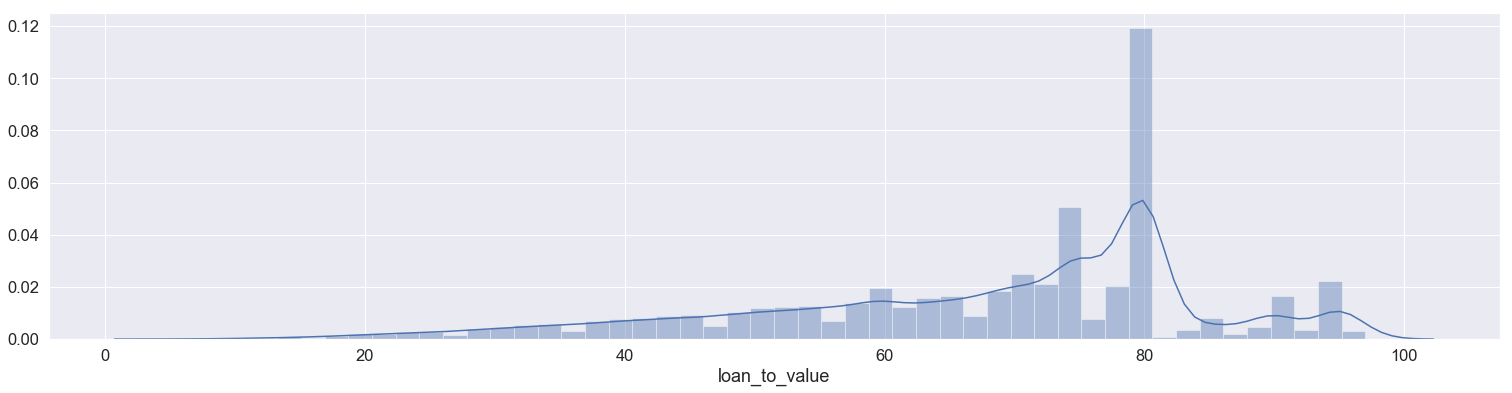

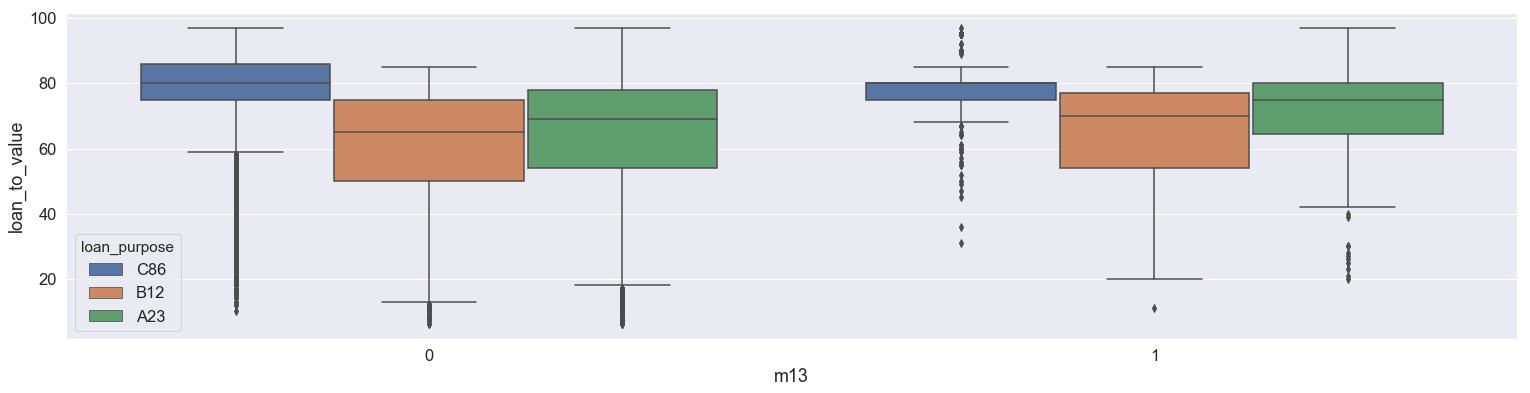

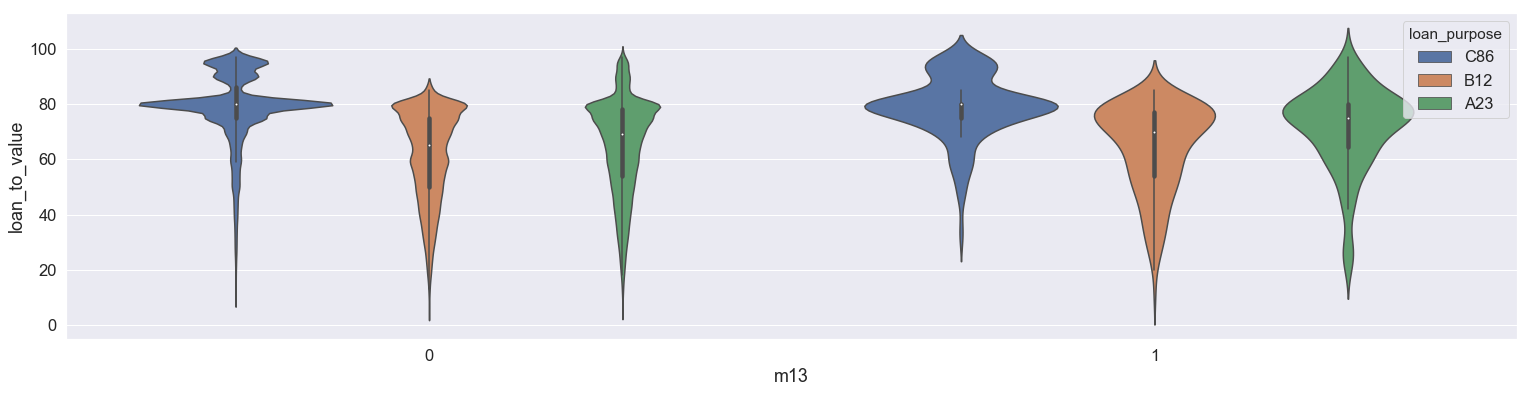

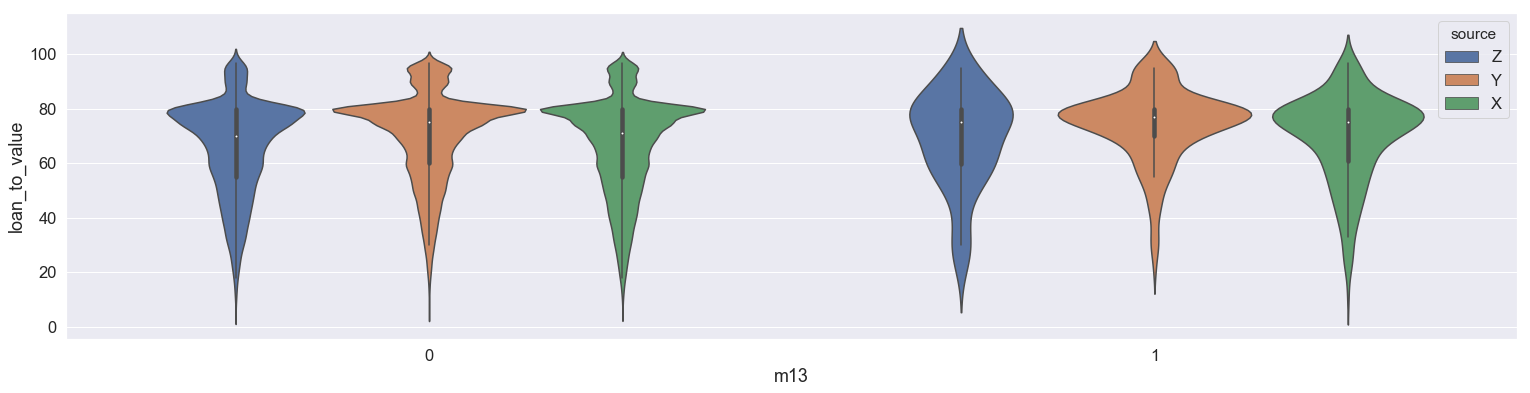

(None, None, None)

In [90]:
plotnum("loan_to_value"), boxplot("loan_to_value"), violinpot("loan_to_value") 
#loan to value ratio generally higher in delinquents overall; specially for loanPurpose c86

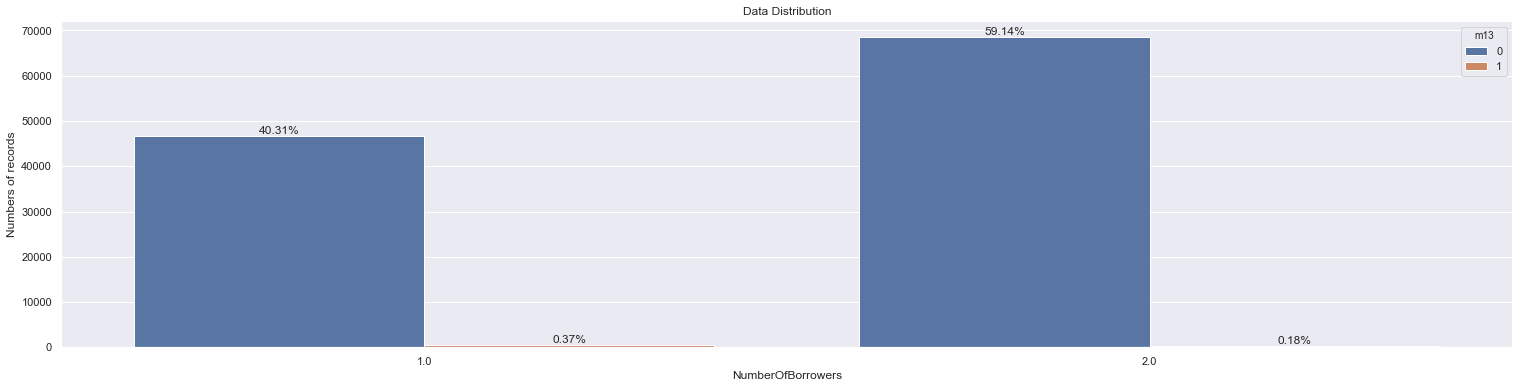

In [91]:
sns.set()
sns.countplot(num_train_data["number_of_borrowers"], hue=num_train_data["m13"]).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/116058 )),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("NumberOfBorrowers")
ax.set_ylabel("Numbers of records")
plt.show()
#2 borrowers are less likely to delinquent

In [92]:
num_train_data[num_train_data["insurance_percent"]>0].shape[0]/116058

0.11720863706077995

In [93]:
insurance_cover=num_train_data[num_train_data["insurance_percent"]>0][["insurance_percent", "insurance_type", "m13"]]
pd.crosstab(insurance_cover["m13"], insurance_cover["insurance_type"], margins=True )

insurance_type,0.0,1.0,All
m13,,,
0,13140,373,13513
1,85,5,90
All,13225,378,13603


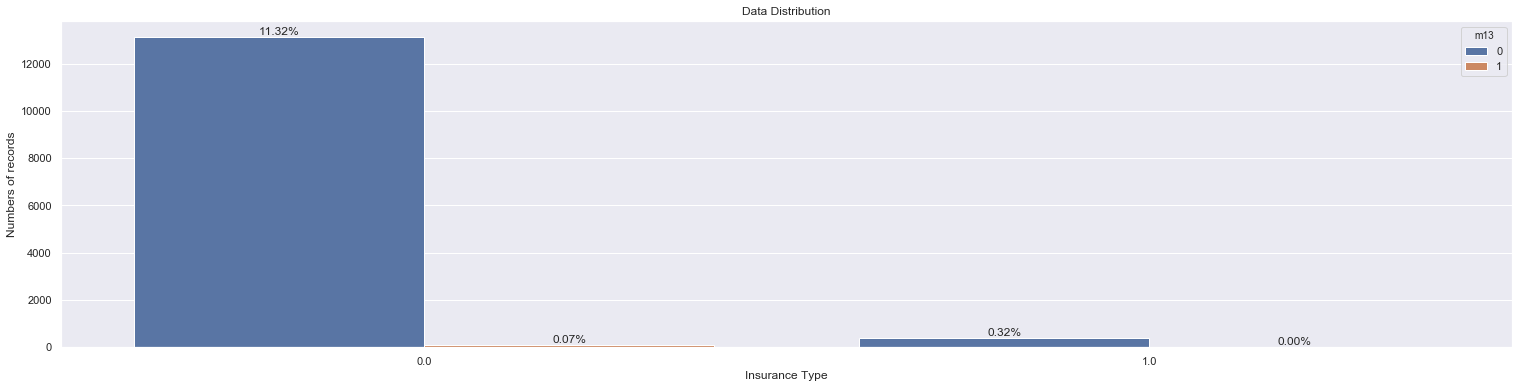

In [94]:
sns.set()
sns.countplot(insurance_cover["insurance_type"], hue=insurance_cover["m13"]).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/116058 )),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Insurance Type")
ax.set_ylabel("Numbers of records")
plt.show()
#11.71% covered 
#0.32% covered by lender

posx and posy should be finite values
posx and posy should be finite values


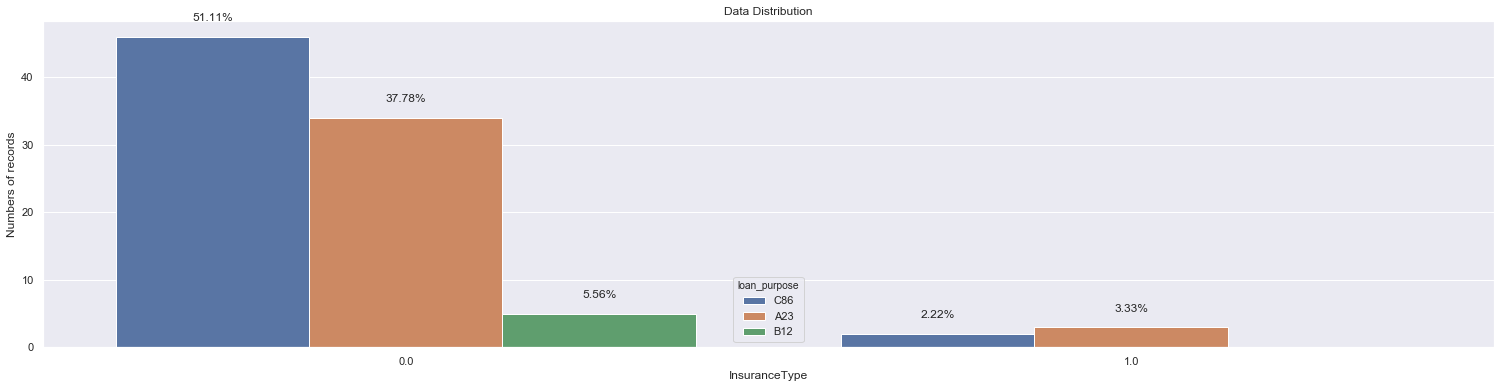

In [95]:
insurance_cov_delin=train_data[(train_data["insurance_percent"]>0) & (train_data["m13"]==1)][["insurance_type", "loan_purpose"]]
sns.set()
sns.countplot(insurance_cov_delin["insurance_type"], hue=insurance_cov_delin["loan_purpose"]).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/90 )),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("InsuranceType")
ax.set_ylabel("Numbers of records")
plt.show()
#lenders do not give insurance cover for loan purpose B12

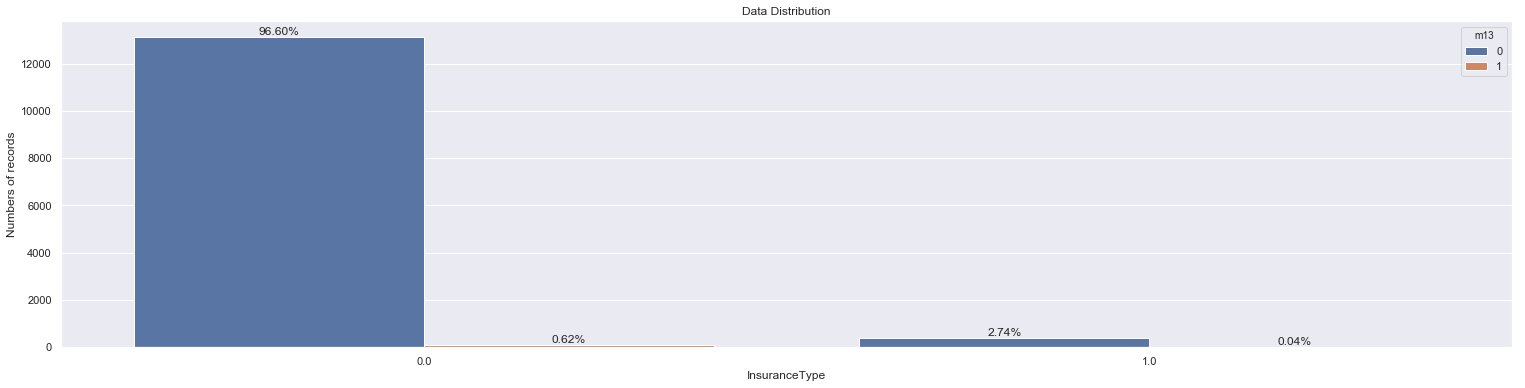

In [96]:
sns.set()
sns.countplot(insurance_cover["insurance_type"], hue=insurance_cover["m13"]).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/13603 )),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("InsuranceType")
ax.set_ylabel("Numbers of records")
plt.show()
#accounts covered by lender are less likely to delinquent- 0.04percent

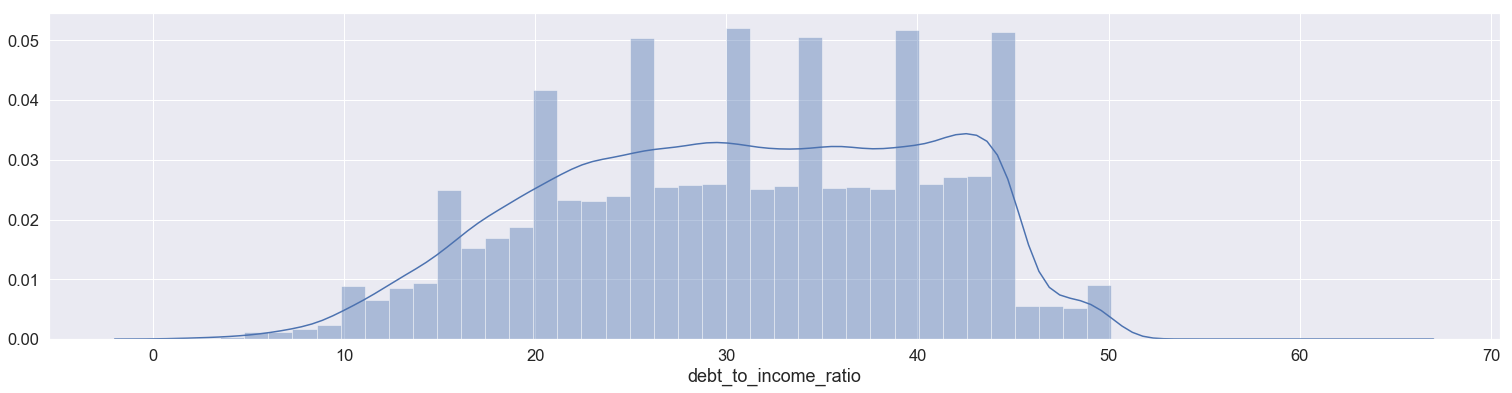

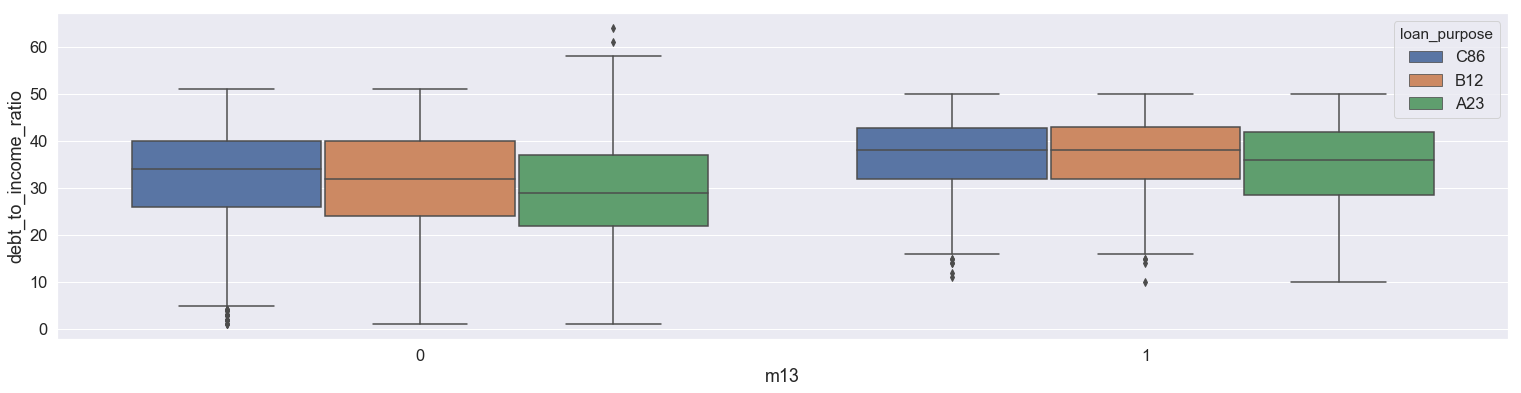

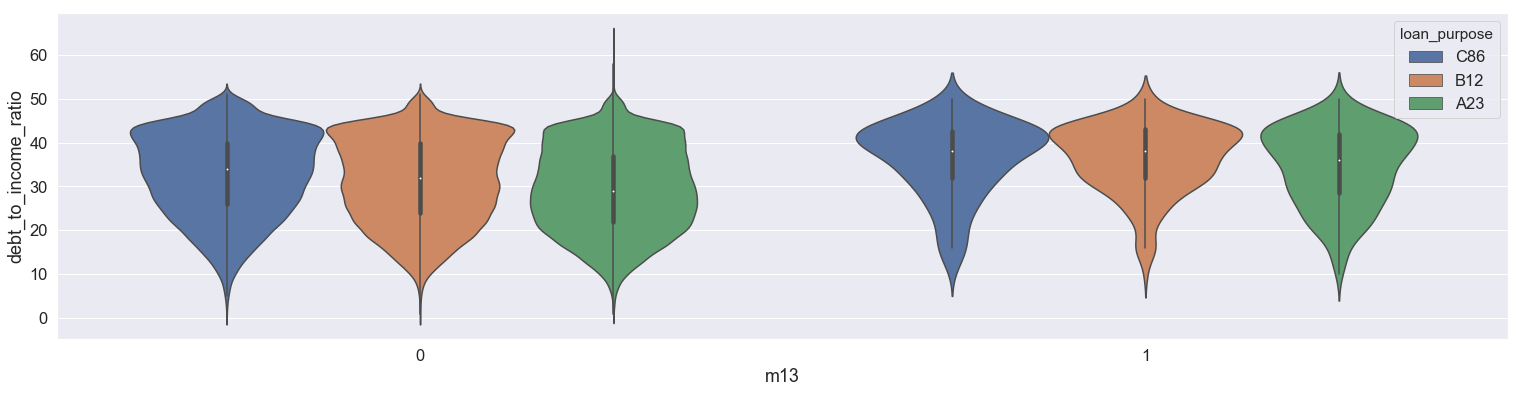

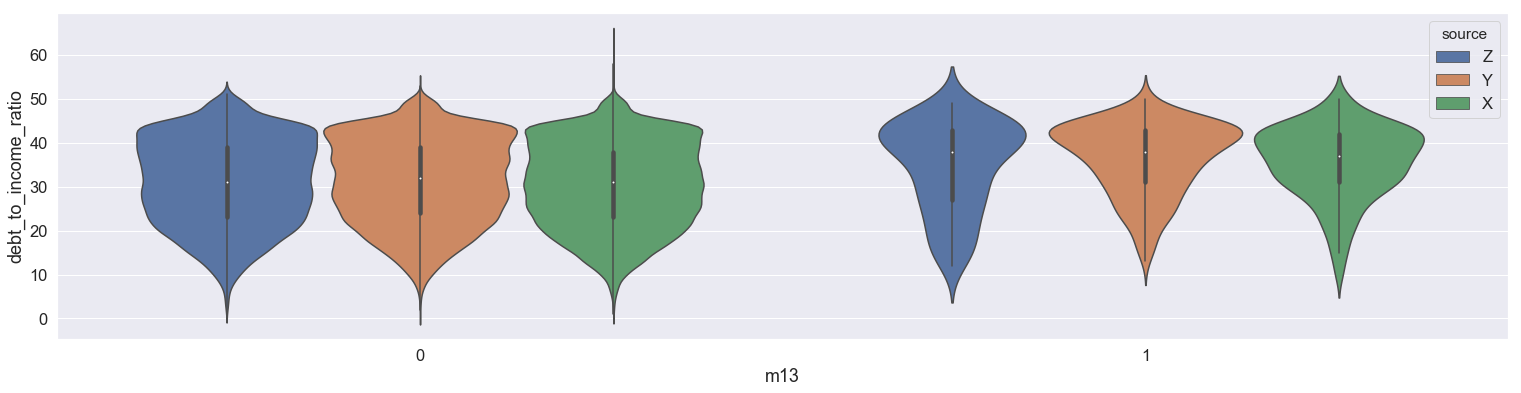

(None, None, None)

In [97]:
plotnum("debt_to_income_ratio"), boxplot("debt_to_income_ratio"), violinpot("debt_to_income_ratio")
# debt to income ratio is higher in delinquents
# few have low ratio, stil delinquent

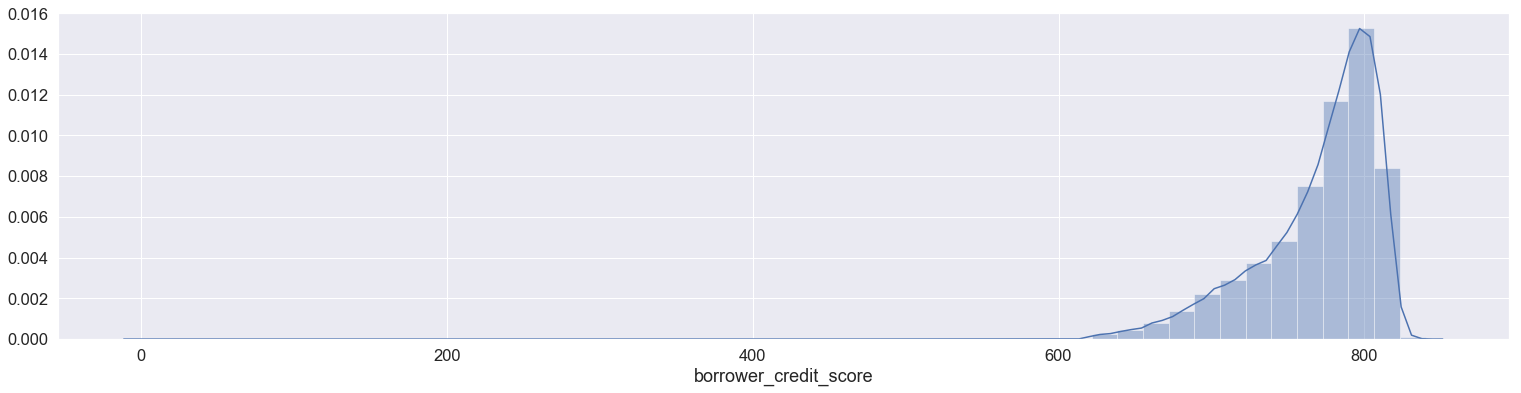

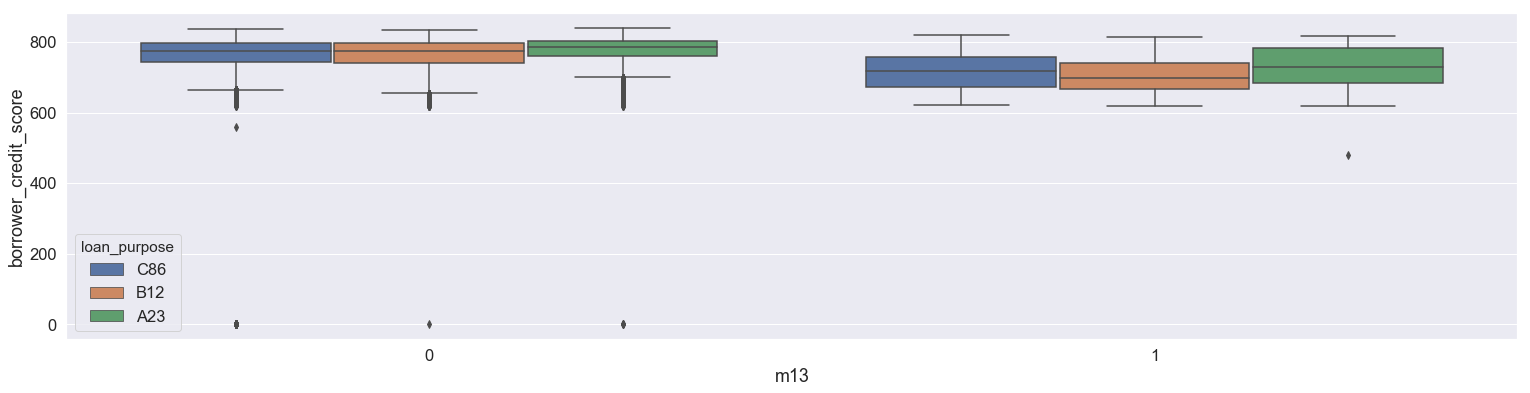

(None, None)

In [98]:
plotnum('borrower_credit_score'), boxplot("borrower_credit_score")
# considerable difference in credit score

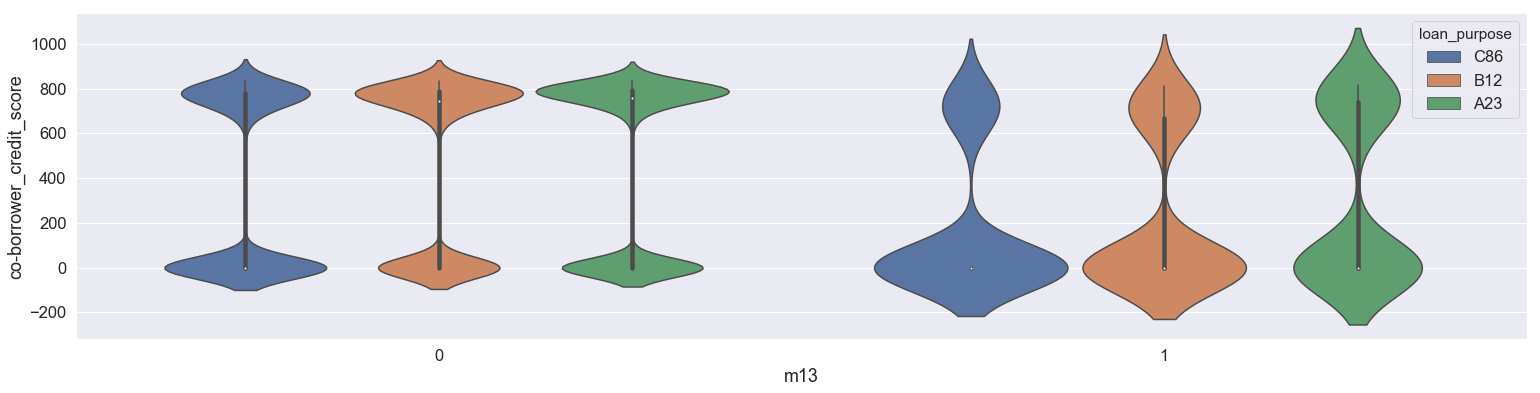

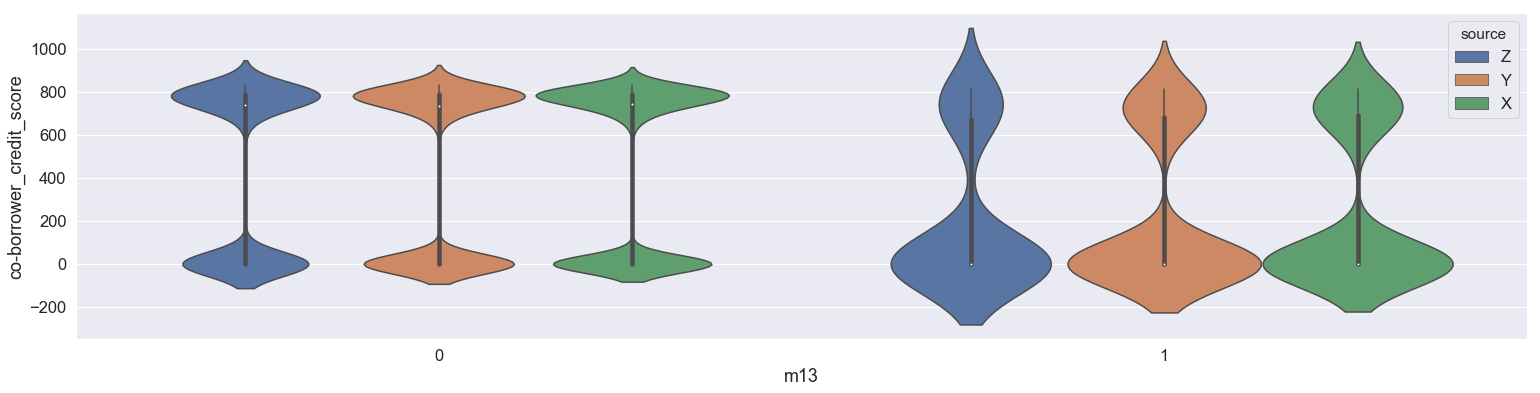

In [99]:
violinpot("co-borrower_credit_score")
# delinqunts's coborrower crdit score is  also low , however, non delinquents coborrower score ishigh

In [100]:
month_wise_LP.head(2)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0


stack- columns to row index
unstack- row index to columns

.stack() rotates the lowest level of the column MultiIndex to the row index (.unstack() works in the opposite direction - try it out)

### Delinquency Analysis

In [101]:
dict1={}
def deliquency_in_months(i):
    v=list(month_wise_LP[i].value_counts())
    k=list(month_wise_LP[i].value_counts().index)
    dict2=dict(zip(k,v))
    dict1[i]=dict2
    return(dict(zip(k,v)))

In [102]:
m=month_wise_LP
months=m.columns

In [103]:
for month in months:
    print("for month", month, deliquency_in_months(month))
    

for month m1 {0: 115729, 1: 293, 2: 30, 3: 6}
for month m2 {0: 115844, 1: 196, 2: 13, 3: 3, 4: 2}
for month m3 {0: 115868, 1: 167, 2: 14, 3: 4, 4: 3, 5: 2}
for month m4 {0: 115860, 1: 168, 2: 16, 3: 8, 4: 3, 6: 2, 5: 1}
for month m5 {0: 115752, 1: 249, 2: 33, 3: 12, 4: 6, 5: 3, 7: 2, 6: 1}
for month m6 {0: 115785, 1: 214, 2: 26, 3: 16, 4: 9, 5: 4, 6: 2, 8: 1, 7: 1}
for month m7 {0: 115728, 1: 266, 2: 28, 3: 13, 4: 8, 5: 7, 6: 4, 7: 2, 9: 1, 8: 1}
for month m8 {0: 115696, 1: 274, 2: 49, 4: 10, 3: 10, 5: 7, 6: 6, 7: 4, 10: 1, 9: 1}
for month m9 {0: 115687, 1: 273, 2: 41, 3: 25, 5: 8, 4: 7, 6: 6, 7: 5, 8: 4, 11: 1, 10: 1}
for month m10 {0: 115613, 1: 325, 2: 54, 3: 21, 4: 15, 6: 8, 5: 6, 8: 5, 7: 5, 9: 4, 12: 1, 11: 1}
for month m11 {0: 115612, 1: 320, 2: 48, 3: 26, 5: 12, 4: 11, 7: 9, 6: 7, 9: 4, 8: 4, 10: 3, 13: 1, 11: 1}
for month m12 {0: 115557, 1: 366, 2: 47, 3: 28, 4: 15, 6: 14, 7: 7, 5: 7, 10: 5, 8: 5, 11: 3, 9: 3, 14: 1}


In [104]:
indexes=[]
for i in range(0, 15):
    if(i==0):
        days1=0
        indexes.append((str(days1)+"daysPastDue"))
    else:
            if(i==1):
                days1=0   
                days2=days1+30   
                indexes.append((str(days1)+"-"+str(days2)+"daysPastDue"))
            else:
                days1+=30
                days2+=30
                indexes.append((str(days1)+"-"+str(days2)+"daysPastDue"))
indexes

['0daysPastDue',
 '0-30daysPastDue',
 '30-60daysPastDue',
 '60-90daysPastDue',
 '90-120daysPastDue',
 '120-150daysPastDue',
 '150-180daysPastDue',
 '180-210daysPastDue',
 '210-240daysPastDue',
 '240-270daysPastDue',
 '270-300daysPastDue',
 '300-330daysPastDue',
 '330-360daysPastDue',
 '360-390daysPastDue',
 '390-420daysPastDue']

In [105]:
delinquencyReport=pd.DataFrame(dict1)

##### Delinquency Reprort

In [106]:
delinquencyReport["dpd"]=indexes

In [107]:
delinquencyReport=delinquencyReport[['dpd','m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11',
       'm12' ]]

In [108]:
# delinquencyReport.fillna(value=0)

In [109]:
# delinquencyReport=delinquencyReport.set_index("dpd")
delinquencyReport

,dpd,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0daysPastDue,115729.0,115844.0,115868.0,115860.0,115752.0,115785.0,115728.0,115696.0,115687.0,115613.0,115612.0,115557.0
1,0-30daysPastDue,293.0,196.0,167.0,168.0,249.0,214.0,266.0,274.0,273.0,325.0,320.0,366.0
2,30-60daysPastDue,30.0,13.0,14.0,16.0,33.0,26.0,28.0,49.0,41.0,54.0,48.0,47.0
3,60-90daysPastDue,6.0,3.0,4.0,8.0,12.0,16.0,13.0,10.0,25.0,21.0,26.0,28.0
4,90-120daysPastDue,NaN,2.0,3.0,3.0,6.0,9.0,8.0,10.0,7.0,15.0,11.0,15.0
5,120-150daysPastDue,NaN,NaN,2.0,1.0,3.0,4.0,7.0,7.0,8.0,6.0,12.0,7.0
6,150-180daysPastDue,NaN,NaN,NaN,2.0,1.0,2.0,4.0,6.0,6.0,8.0,7.0,14.0
7,180-210daysPastDue,NaN,NaN,NaN,NaN,2.0,1.0,2.0,4.0,5.0,5.0,9.0,7.0
8,210-240daysPastDue,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,4.0,5.0,4.0,5.0
9,240-270daysPastDue,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,4.0,4.0,3.0


### Feature Engineering

###### Binning of loan_term

In [12]:
bins=[59,90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]
labels=["60-90", "90-120", "120-150", "150-180", "180-210","210-240", "240-270", "270-300", "300-330", "330-360","360-390","390-420"]

In [13]:
train_data["loan_term_labels"]=pd.cut(train_data["loan_term"], bins=bins, labels=labels)

In [14]:
train_data["loan_term_labels"].value_counts()

330-360    71959
150-180    28779
90-120      7278
210-240     6776
270-300      955
120-150      136
300-330      102
60-90         42
240-270       24
180-210        7
390-420        0
360-390        0
Name: loan_term_labels, dtype: int64

In [113]:

pd.crosstab(train_data["m13"],train_data["loan_term"],)


loan_term,60,71,72,77,78,81,82,83,84,85,...,348,349,351,352,353,354,355,358,359,360
m13,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,1,1,1,1,1,21,1,...,33,1,1,4,2,2,4,1,1,71324
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,488


###### Delinquent's loan term and origination date

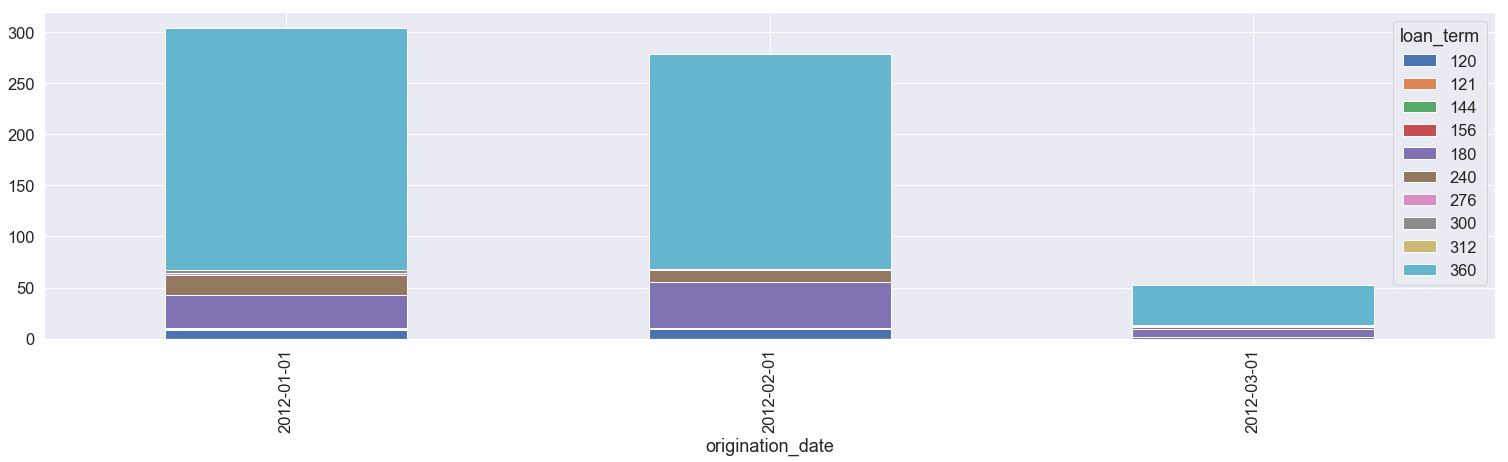

In [114]:
pd.crosstab( train_data[train_data["m13"]==1]["origination_date"],train_data[train_data["m13"]==1]["loan_term"]).plot.bar(stacked=True)

Obseravtion:
    - Accounts which have taken loan for 60-90 days are less likely to delinquent
    
    - Jan and Feb are preferable months for taking a year long loan or more than half a year loans
    
    - Hence more likely to delinquent 

###### Delinquents which originated in Jan , their first paymenyt date as per the loan_term

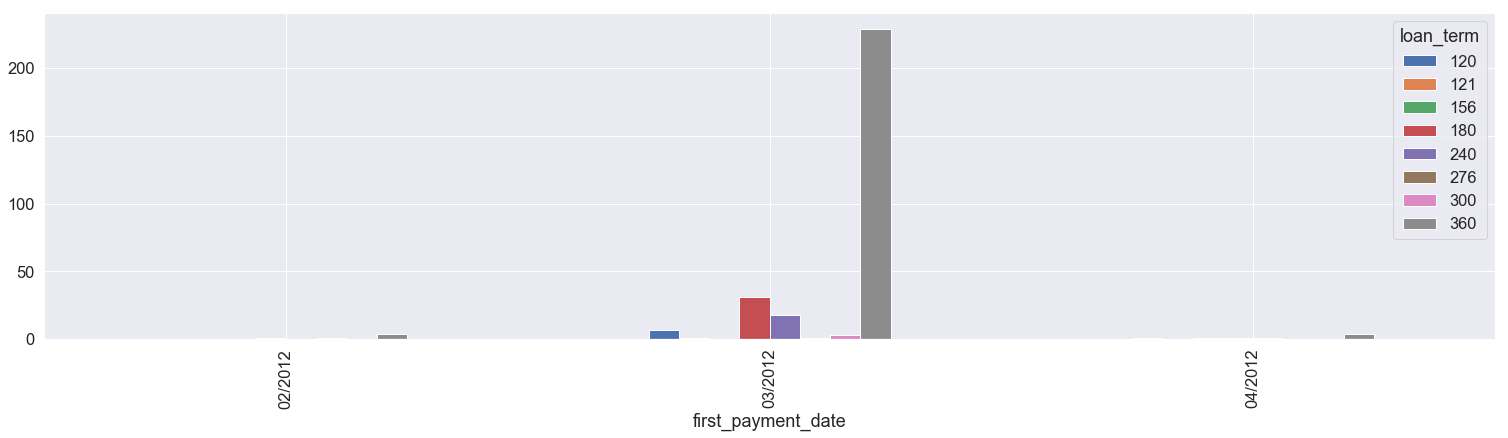

In [115]:
pd.crosstab(train_data[(train_data["origination_date"]=="2012-01-01") & (train_data["m13"]==1)]["first_payment_date"],train_data[(train_data["origination_date"]=="2012-01-01") & (train_data["m13"]==1)]["loan_term"]).plot.bar(stacked=False)

###### Delinquents which originated in Feb , their first paymenyt date as per the loan_term

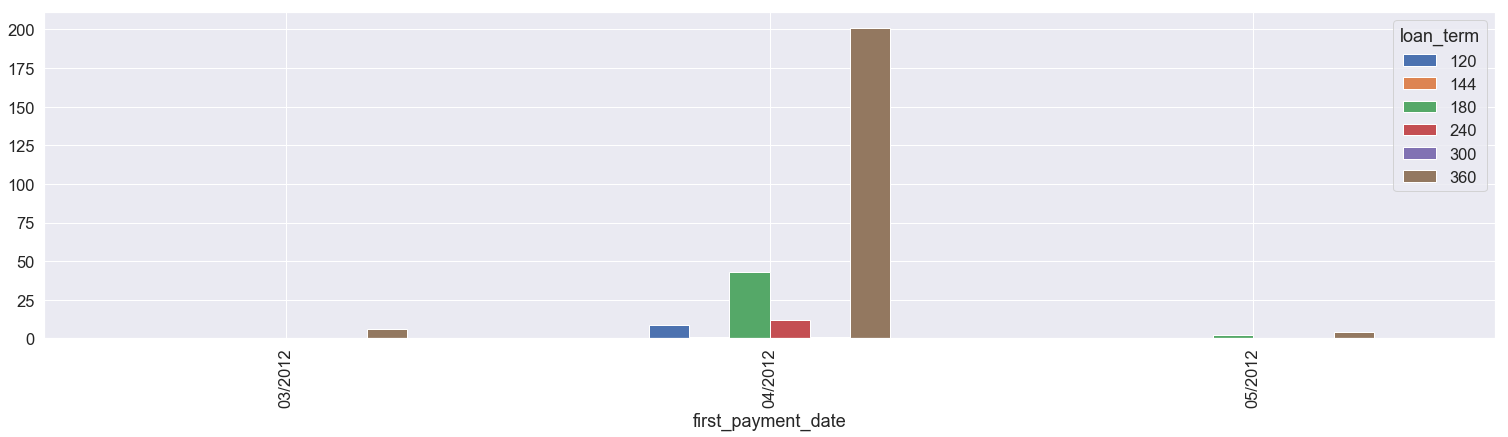

In [116]:
pd.crosstab(train_data[(train_data["origination_date"]=="2012-02-01") & (train_data["m13"]==1)]["first_payment_date"],train_data[(train_data["origination_date"]=="2012-02-01") & (train_data["m13"]==1)]["loan_term"]).plot.bar(stacked=False)

###### Delinquents which originated in Feb , their first paymenyt date as per the loan_term

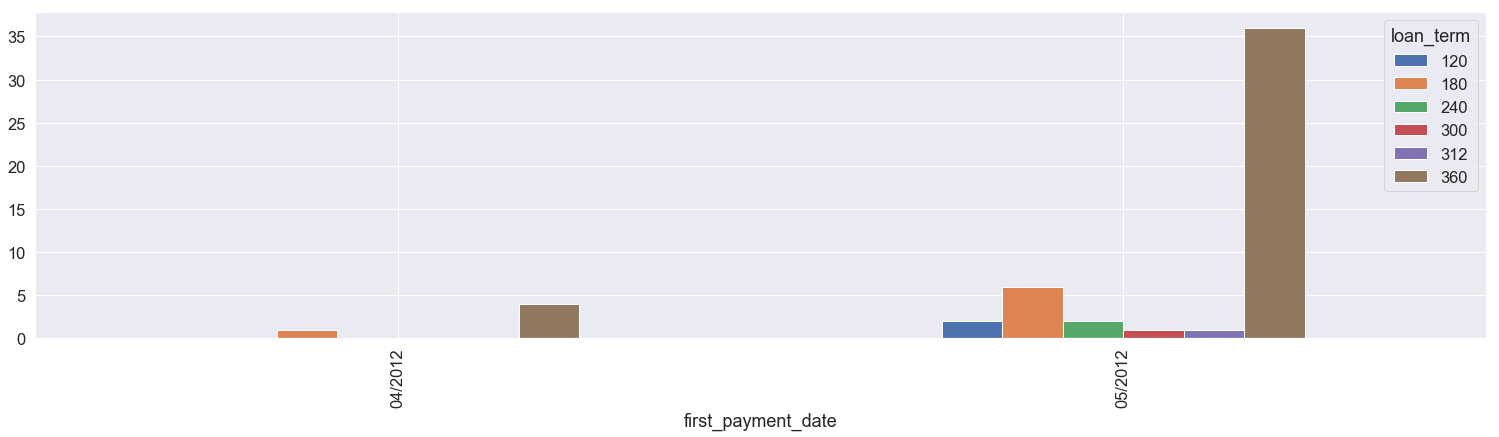

In [117]:
pd.crosstab(train_data[(train_data["origination_date"]=="2012-03-01") & (train_data["m13"]==1)]["first_payment_date"],train_data[(train_data["origination_date"]=="2012-03-01") & (train_data["m13"]==1)]["loan_term"] ).plot.bar()

obs:
    -- Yearly or half yearly loan terms has their first payment date after two months majorly.

###### Loan to value ratio on scale of 10  

In [15]:
train_data['LTV_scale_10'] = np.array(
                   np.round((train_data['loan_to_value'] / 10)),  
                   dtype='float')
train_data[["loan_to_value", "LTV_scale_10"]].head(3)

,loan_to_value,LTV_scale_10
0,95,10.0
1,72,7.0
2,49,5.0


###### Bining of Loan to value

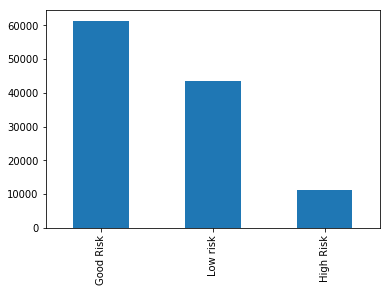

In [16]:
bins=[0,6,8, 10]
labels=["Low risk", "Good Risk","High Risk"]
train_data["Risk_Level"]=pd.cut(train_data["LTV_scale_10"],bins=bins, labels=labels, right=True)
train_data["Risk_Level"].value_counts().plot.bar(stacked=True)

In [120]:
pd.crosstab( train_data["m13"], train_data["Risk_Level"])

Risk_Level,Low risk,Good Risk,High Risk
m13,,,
0,43245,60982,11195
1,174,389,73


In [121]:
pd.crosstab( train_data[train_data["m13"]==1]["Risk_Level"], train_data[train_data["m13"]==1]["loan_term"])

loan_term,120,121,144,156,180,240,276,300,312,360
Risk_Level,,,,,,,,,,
Low risk,17,0,0,0,37,11,1,1,1,106
Good Risk,2,1,1,1,45,22,1,4,0,312
High Risk,0,0,0,0,3,0,0,0,0,70


Obs: 
    -- Delinquent accounts which have 6+months loan have loan to value ratio between 60-80 percent

##### Loan to value ratio on quantile scale 

##### Adaptive Binning

In [122]:
train_data["loan_to_value"].describe()

count    116058.000000
mean         67.431939
std          17.291719
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

In [17]:
quantile_list=[0, 0.25, 0.50, 0.75, 1.0]
quantiles=train_data["loan_to_value"].quantile(quantile_list)
quantiles

0.00     6.0
0.25    57.0
0.50    72.0
0.75    80.0
1.00    97.0
Name: loan_to_value, dtype: float64

Text(0, 0.5, 'Frequency')

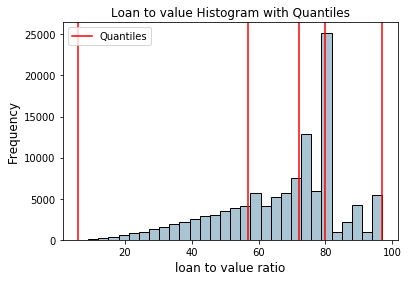

In [18]:
fig, ax = plt.subplots()
train_data['loan_to_value'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Loan to value Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('loan to value ratio', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


In [19]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
train_data['LTV_quantile_range'] = pd.qcut(
                                            train_data['loan_to_value'], 
                                            q=quantile_list)
train_data['LTV_quantile_label'] = pd.qcut(
                                            train_data['loan_to_value'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

train_data[['loan_to_value', 'LTV_scale_10','Risk_Level', 'LTV_quantile_range',
            'LTV_quantile_label'
              ]].iloc[4:9]

,loan_to_value,LTV_scale_10,Risk_Level,LTV_quantile_range,LTV_quantile_label
4,80,8.0,Good Risk,"(72.0, 80.0]",50-75Q
5,80,8.0,Good Risk,"(72.0, 80.0]",50-75Q
6,95,10.0,High Risk,"(80.0, 97.0]",75-100Q
7,62,6.0,Low risk,"(57.0, 72.0]",25-50Q
8,76,8.0,Good Risk,"(72.0, 80.0]",50-75Q


In [126]:
pd.crosstab(train_data[train_data["m13"]==1]["Risk_Level"], train_data[train_data["m13"]==1]["LTV_quantile_label"])

LTV_quantile_label,0-25Q,25-50Q,50-75Q,75-100Q
Risk_Level,,,,
Low risk,105,69,0,0
Good Risk,0,78,294,17
High Risk,0,0,0,73


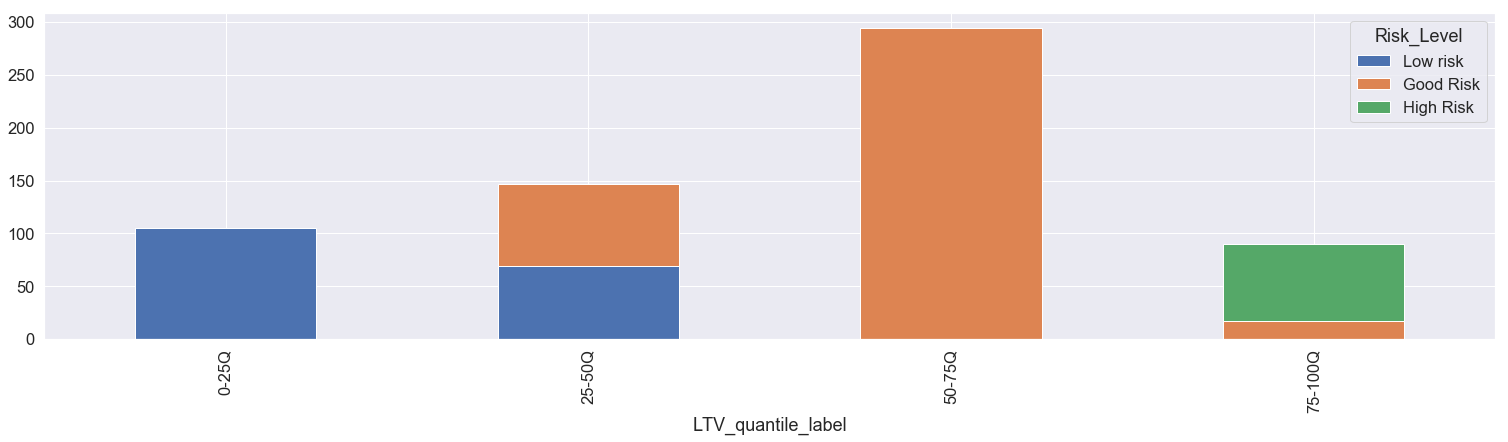

In [127]:
pd.crosstab(train_data[train_data["m13"]==1]["LTV_quantile_label"],train_data[train_data["m13"]==1]["Risk_Level"], ).plot.bar(stacked=True)

###### Low Risk delinquents' loan term and LTV Quantile

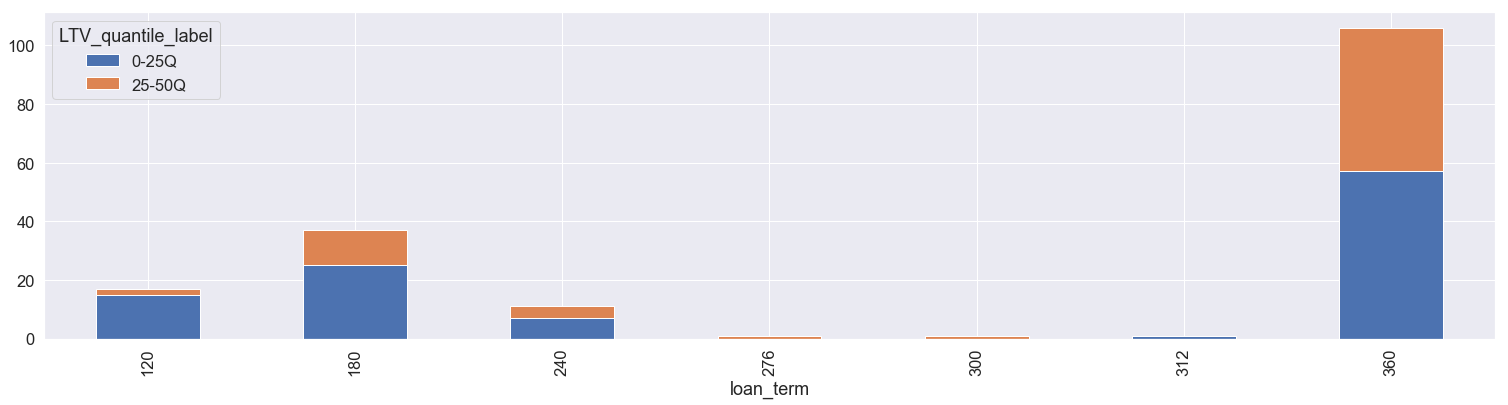

In [128]:
pd.crosstab(train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="Low risk")]["loan_term"],train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="Low risk")]["LTV_quantile_label"]).plot.bar(stacked=True)

###### Good Risk delinquents' loan term and LTV Quantile

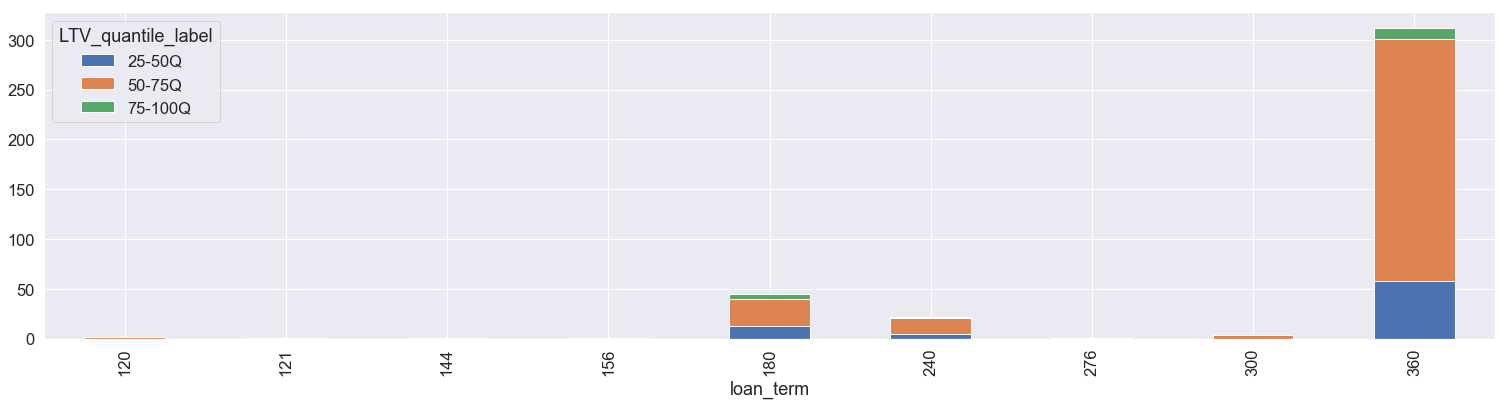

In [129]:
pd.crosstab(train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="Good Risk")]["loan_term"],train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="Good Risk")]["LTV_quantile_label"]).plot.bar(stacked=True)

###### high Risk delinquents' loan term and LTV Quantile

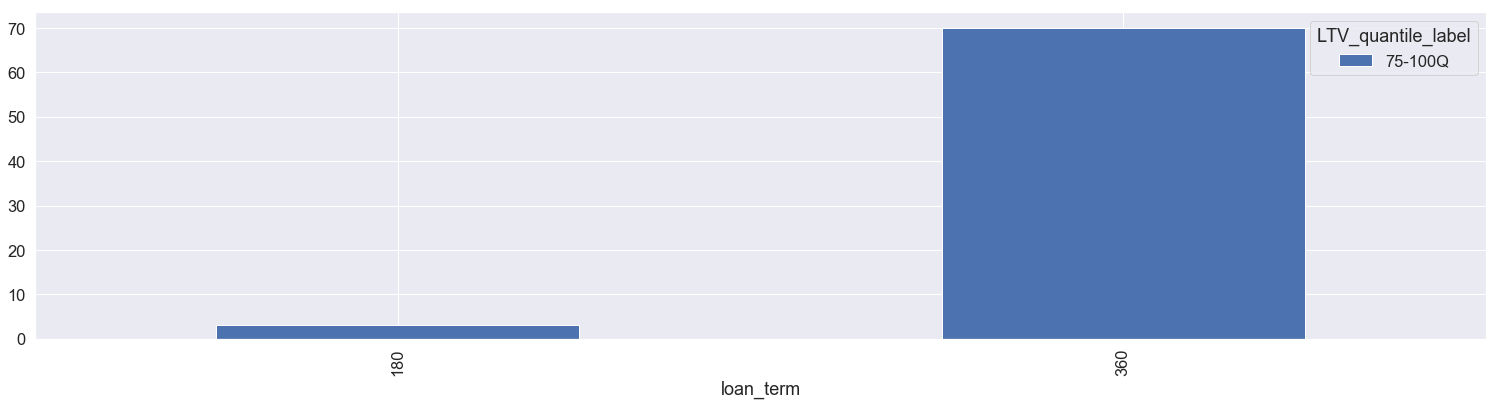

In [130]:
pd.crosstab(train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="High Risk")]["loan_term"],train_data[(train_data["m13"]==1) & (train_data["Risk_Level"]=="High Risk")]["LTV_quantile_label"]).plot.bar(stacked=True)

Obs: Obs: It is obvious that high LTV tend to delinquent but there is more number of low and good risk

    which  tend to delinquent but with a year long loan term
    
-----Need to keep a check on High LTV with 6+months

### Debt to Income Ratio

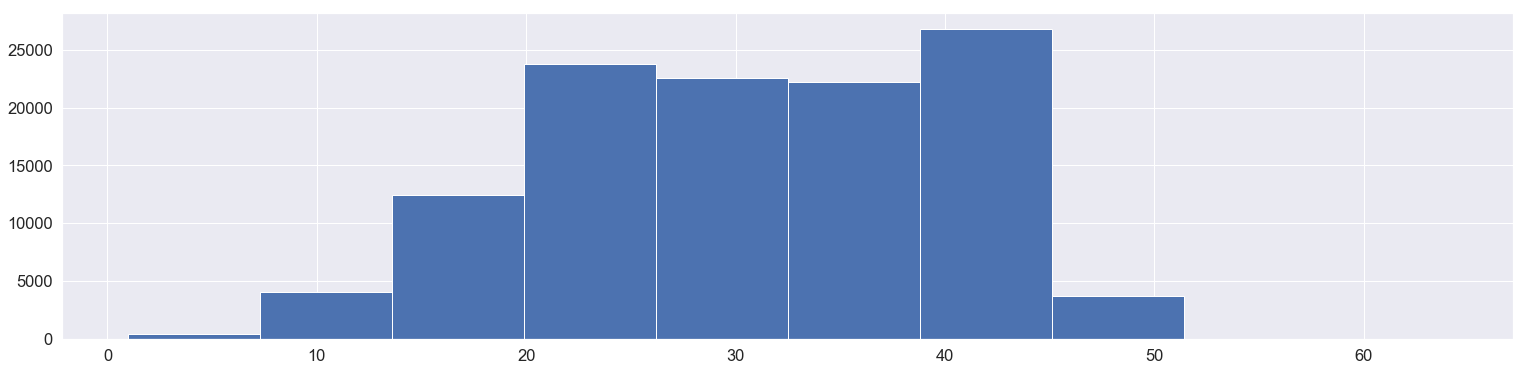

In [131]:
train_data["debt_to_income_ratio"].hist()

In [132]:
train_data["debt_to_income_ratio"].describe()

count    116058.000000
mean         30.742293
std           9.730798
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

###### Debt to income ration scale of 10

In [20]:
train_data['DTI_scale_10'] = np.array(
                   np.round((train_data['debt_to_income_ratio'] / 10)),  
                   dtype='float')
train_data[["debt_to_income_ratio", "DTI_scale_10"]].head(3)

,debt_to_income_ratio,DTI_scale_10
0,22.0,2.0
1,44.0,4.0
2,33.0,3.0


In [21]:
quantile_list=[0, 0.25, 0.50, 0.75, 1.0]
quantiles=train_data["debt_to_income_ratio"].quantile(quantile_list)
quantiles

0.00     1.0
0.25    23.0
0.50    31.0
0.75    39.0
1.00    64.0
Name: debt_to_income_ratio, dtype: float64

Text(0, 0.5, 'Frequency')

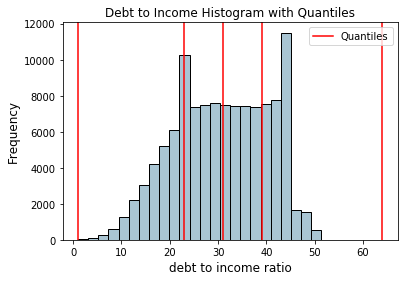

In [16]:
fig, ax = plt.subplots()
train_data['debt_to_income_ratio'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Debt to Income Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('debt to income ratio', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [64]:
quantile_labels = ['under20', '20-50', '50-75', '75-100']
train_data['DTI_quantile_range'] = pd.qcut(
                                            train_data['debt_to_income_ratio'], 
                                            q=quantile_list)
train_data['DTI_quantile_label'] = pd.qcut(
                                            train_data['loan_to_value'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

train_data[['debt_to_income_ratio', 'DTI_scale_10', 'DTI_quantile_range',
            'DTI_quantile_label'
              ]].iloc[4:9]

,debt_to_income_ratio,DTI_scale_10,DTI_quantile_range,DTI_quantile_label
4,43.0,4.0,"(39.0, 64.0]",50-75
5,46.0,5.0,"(39.0, 64.0]",50-75
6,44.0,4.0,"(39.0, 64.0]",75-100
7,45.0,4.0,"(39.0, 64.0]",20-50
8,35.0,4.0,"(31.0, 39.0]",50-75


Delinquents whose DTI is high, their LTV is also high, high correlation

In [137]:
pd.crosstab(train_data[train_data["m13"]==1]["DTI_quantile_label"], train_data[train_data["m13"]==1]["LTV_quantile_label"])

LTV_quantile_label,0-25Q,25-50Q,50-75Q,75-100Q
DTI_quantile_label,,,,
under20,105,0,0,0
20-50,0,147,0,0
50-75,0,0,294,0
75-100,0,0,0,90


delinquents falling under good risk have high DTI between 40-50

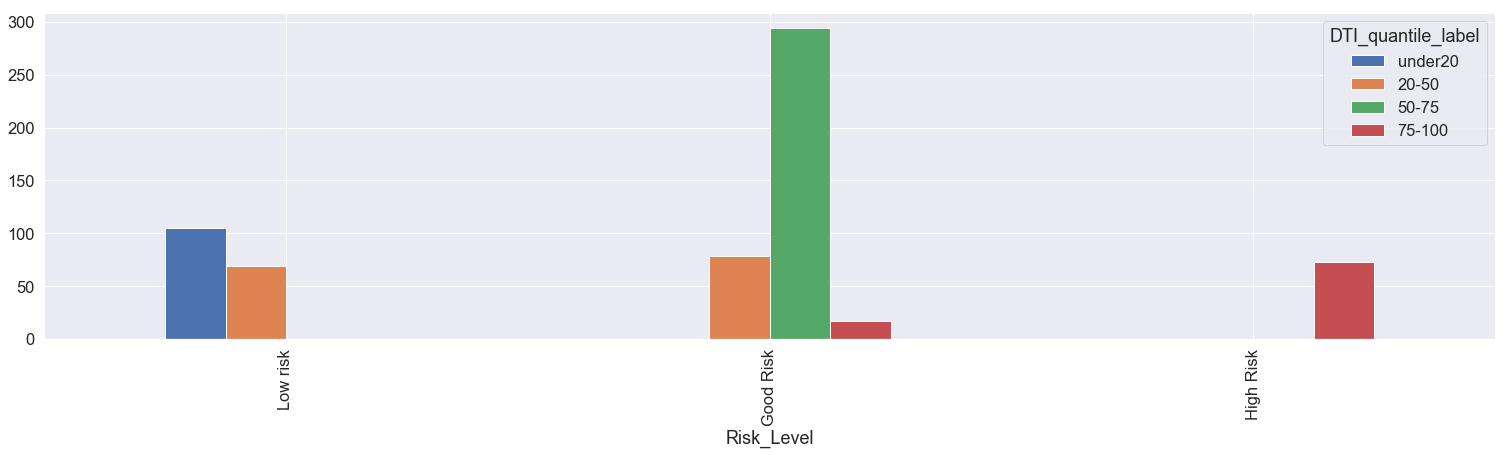

In [138]:
pd.crosstab(train_data[train_data["m13"]==1]["Risk_Level"], train_data[train_data["m13"]==1]["DTI_quantile_label"]).plot.bar()

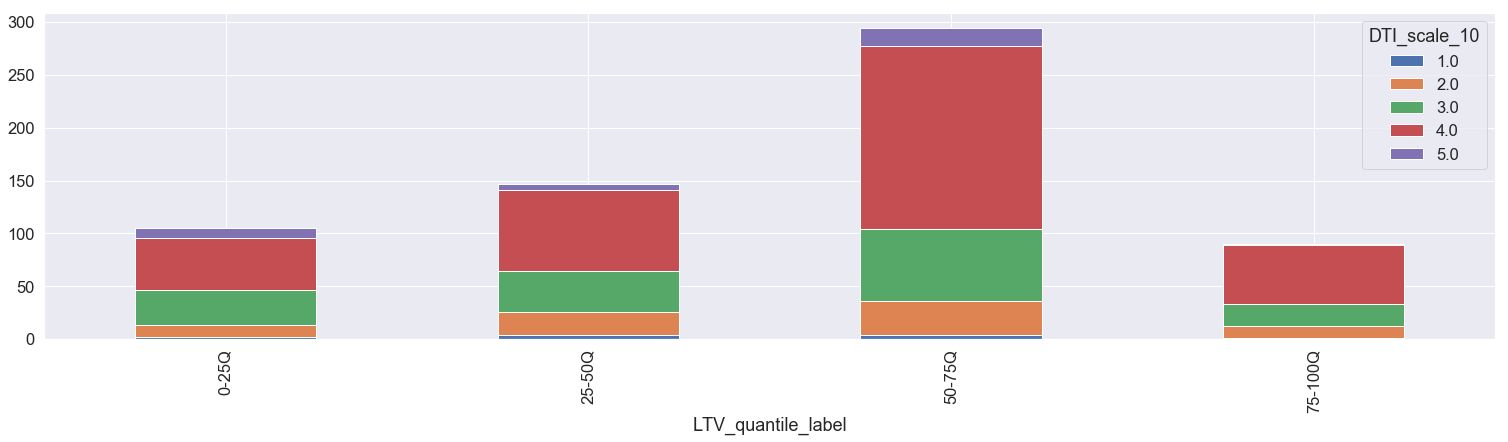

In [139]:
pd.crosstab(train_data[train_data["m13"]==1]["LTV_quantile_label"], train_data[train_data["m13"]==1]["DTI_scale_10"]).plot.bar(stacked=True)

In [140]:
train_data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'loan_term_labels', 'LTV_scale_10', 'Risk_Level',
       'LTV_quantile_range', 'LTV_quantile_label', 'DTI_scale_10',
       'DTI_quantile_range', 'DTI_quantile_label'],
      dtype='object')

In [22]:
import datetime as dt
train_data["origination_date"]=pd.to_datetime(train_data["origination_date"])
train_data['first_payment_date']=pd.to_datetime(train_data["first_payment_date"])
train_data["1st pd afterDays"]=train_data['first_payment_date']-train_data['origination_date']

In [142]:
train_data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'loan_term_labels', 'LTV_scale_10', 'Risk_Level',
       'LTV_quantile_range', 'LTV_quantile_label', 'DTI_scale_10',
       'DTI_quantile_range', 'DTI_quantile_label', '1st pd afterDays'],
      dtype='object')

In [143]:
# train_data.drop(['origination_date','first_payment_date' ], axis=1, inplace=True)

In [144]:
train_data.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m13,loan_term_labels,LTV_scale_10,Risk_Level,LTV_quantile_range,LTV_quantile_label,DTI_scale_10,DTI_quantile_range,DTI_quantile_label,1st pd afterDays
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,1,330-360,10.0,High Risk,"(80.0, 97.0]",75-100Q,2.0,"(0.999, 23.0]",75-100,61 days
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,1,330-360,7.0,Good Risk,"(57.0, 72.0]",25-50Q,4.0,"(39.0, 64.0]",20-50,60 days


In [145]:
train_data[train_data["m13"]==1]["1st pd afterDays"].value_counts()

60 days    557
61 days     48
31 days     11
91 days      8
29 days      6
90 days      6
Name: 1st pd afterDays, dtype: int64

In [23]:
train_data["1st pd afterDays"]=(train_data["1st pd afterDays"] / np.timedelta64(1, 'D')).astype(int)

In [147]:
train_data.dtypes

loan_id                              int64
source                              object
financial_institution               object
interest_rate                      float64
unpaid_principal_bal                 int64
loan_term                            int64
origination_date            datetime64[ns]
first_payment_date          datetime64[ns]
loan_to_value                        int64
number_of_borrowers                float64
debt_to_income_ratio               float64
borrower_credit_score              float64
loan_purpose                        object
insurance_percent                  float64
co-borrower_credit_score           float64
insurance_type                     float64
m1                                   int64
m2                                   int64
m3                                   int64
m4                                   int64
m5                                   int64
m6                                   int64
m7                                   int64
m8         

In [276]:
train_data[["origination_date", "first_payment_date"]].head(3)

,origination_date,first_payment_date
0,2012-03-01,2012-05-01
1,2012-01-01,2012-03-01
2,2012-01-01,2012-03-01


In [24]:
train_data["origination_date"]=pd.to_datetime(train_data["origination_date"])
train_data["origination_date"].value_counts()

2012-02-01    52334
2012-01-01    49093
2012-03-01    14631
Name: origination_date, dtype: int64

In [25]:
# train_data["origination_date"]=t["origination_date"]
dict3={"2012-01-01" : "Jan","2012-02-01": "Feb","2012-03-01": "Mar"}
train_data["origination_date"]=train_data["origination_date"].astype(str).map(dict3)


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
train_data["origination_date"]=le.fit_transform(train_data["origination_date"])

In [341]:
# train_data["first_payment_date"]=pd.to_datetime(train_data["first_payment_date"])
train_data["first_payment_date"].value_counts()

04/2012    52840
03/2012    47680
05/2012    15014
02/2012      524
Name: first_payment_date, dtype: int64

In [26]:
dict4={"2012-02-01": "Feb","2012-03-01": "Mar", "2012-04-01": "Apr","2012-05-01":"May"}
train_data["first_payment_date"]=train_data["first_payment_date"].astype(str).map(dict4)

In [26]:
train_data["first_payment_date"]=le.fit_transform(train_data["first_payment_date"])


In [340]:
train_data["first_payment_date"].value_counts()

0    52840
2    47680
3    15014
1      524
Name: first_payment_date, dtype: int64

In [157]:
cat_columns=[i for i in train_data.columns if (train_data[i].dtype == "object")]
cat_columns

['source', 'financial_institution', 'loan_purpose']

In [163]:
train_data["DTI_quantile_label"].value_counts()

2    44037
0    30010
1    28340
3    13671
Name: DTI_quantile_label, dtype: int64

In [164]:
train_data["DTI_quantile_range"].value_counts()

(0.999, 23.0]    29846
(23.0, 31.0]     29745
(31.0, 39.0]     29674
(39.0, 64.0]     26793
Name: DTI_quantile_range, dtype: int64

In [165]:
train_data["DTI_quantile_range"].cat.codes.value_counts()

0    29846
1    29745
2    29674
3    26793
dtype: int64

In [65]:
train_data["DTI_quantile_label"]=train_data["DTI_quantile_label"].cat.codes

In [77]:
train_data["DTI_quantile_range"]=train_data["DTI_quantile_range"].cat.codes

In [166]:
train_data["loan_term_labels"].value_counts()

330-360    71959
150-180    28779
90-120      7278
210-240     6776
270-300      955
120-150      136
300-330      102
60-90         42
240-270       24
180-210        7
390-420        0
360-390        0
Name: loan_term_labels, dtype: int64

In [167]:
train_data["loan_term_labels"].cat.codes.value_counts()

9    71959
3    28779
1     7278
5     6776
7      955
2      136
8      102
0       42
6       24
4        7
dtype: int64

In [28]:
train_data["loan_term_labels"]=train_data["loan_term_labels"].cat.codes

In [169]:
train_data["Risk_Level"].value_counts()

Good Risk    61371
Low risk     43419
High Risk    11268
Name: Risk_Level, dtype: int64

In [170]:
train_data["Risk_Level"].cat.codes.value_counts()

1    61371
0    43419
2    11268
dtype: int64

In [29]:
train_data["Risk_Level"]=train_data["Risk_Level"].cat.codes

In [47]:
train_data["LTV_quantile_label"].value_counts()

50-75Q     44037
0-25Q      30010
25-50Q     28340
75-100Q    13671
Name: LTV_quantile_label, dtype: int64

In [48]:
train_data["LTV_quantile_label"].cat.codes.value_counts()

2    44037
0    30010
1    28340
3    13671
dtype: int64

In [49]:
train_data["LTV_quantile_label"]=train_data["LTV_quantile_label"].cat.codes

In [176]:
train_data["LTV_quantile_range"].value_counts()

(72.0, 80.0]     44037
(5.999, 57.0]    30010
(57.0, 72.0]     28340
(80.0, 97.0]     13671
Name: LTV_quantile_range, dtype: int64

In [177]:
train_data["LTV_quantile_range"].cat.codes.value_counts()

2    44037
0    30010
1    28340
3    13671
dtype: int64

In [51]:
train_data["LTV_quantile_range"]=train_data["LTV_quantile_range"].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [178]:
cat_columns

['source', 'financial_institution', 'loan_purpose']

In [179]:
train_data["loan_purpose"].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [182]:
train_data["loan_purpose"].astype("category").cat.codes.value_counts()

0    58462
1    29383
2    28213
dtype: int64

In [52]:
train_data["loan_purpose"]=train_data["loan_purpose"].astype("category").cat.codes

In [53]:
train_data["source"].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [184]:
train_data["source"].astype("category").cat.codes.value_counts()

0    63858
1    37554
2    14646
dtype: int64

In [54]:
train_data["source"]=train_data["source"].astype("category").cat.codes

In [187]:
train_data["financial_institution"].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [55]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=7, input_type='string')
hashed_features = fh.fit_transform(train_data['financial_institution'])
hashed_features = hashed_features.toarray()
x=pd.concat([train_data['financial_institution'], pd.DataFrame(hashed_features)], 
          axis=1)

In [56]:
y=x.groupby("financial_institution").apply(lambda x: x['financial_institution'].unique())

In [57]:
y

financial_institution
Anderson-Taylor                            [Anderson-Taylor]
Browning-Hart                                [Browning-Hart]
Chapman-Mcmahon                            [Chapman-Mcmahon]
Cole, Brooks and Vincent          [Cole, Brooks and Vincent]
Edwards-Hoffman                            [Edwards-Hoffman]
Martinez, Duffy and Bird          [Martinez, Duffy and Bird]
Miller, Mcclure and Allen        [Miller, Mcclure and Allen]
Nicholson Group                            [Nicholson Group]
OTHER                                                [OTHER]
Richards-Walters                          [Richards-Walters]
Richardson Ltd                              [Richardson Ltd]
Romero, Woods and Johnson        [Romero, Woods and Johnson]
Sanchez, Hays and Wilkerson    [Sanchez, Hays and Wilkerson]
Sanchez-Robinson                          [Sanchez-Robinson]
Suarez Inc                                      [Suarez Inc]
Swanson, Newton and Miller      [Swanson, Newton and Miller]
Ta

In [58]:
import numpy as np
y=np.hstack(y)

In [59]:
I={}
for i in y:
    I[i]=x[x["financial_institution"]==(i)].iloc[0,:]
    
#     print(x[x["financial_institution"]==(i)].iloc[0,:])
print(I)

{'Anderson-Taylor': financial_institution    Anderson-Taylor
0                                     -1
1                                     -3
2                                      3
3                                      1
4                                      5
5                                      0
6                                      0
Name: 84, dtype: object, 'Browning-Hart': financial_institution    Browning-Hart
0                                    0
1                                   -1
2                                    1
3                                   -1
4                                    1
5                                   -2
6                                   -1
Name: 5, dtype: object, 'Chapman-Mcmahon': financial_institution    Chapman-Mcmahon
0                                      0
1                                     -1
2                                     -2
3                                     -1
4                                      4
5        

In [60]:
train_data=pd.concat([train_data, pd.DataFrame(hashed_features)], axis=1)

In [61]:
 train_data.drop(train_data[["financial_institution"]], axis=1, inplace=True)

In [76]:
train_data.dtypes

loan_id                        int64
source                          int8
interest_rate                float64
unpaid_principal_bal           int64
loan_term                      int64
origination_date               int32
first_payment_date             int32
loan_to_value                  int64
number_of_borrowers          float64
debt_to_income_ratio         float64
borrower_credit_score        float64
loan_purpose                    int8
insurance_percent            float64
co-borrower_credit_score     float64
insurance_type               float64
m1                             int64
m2                             int64
m3                             int64
m4                             int64
m5                             int64
m6                             int64
m7                             int64
m8                             int64
m9                             int64
m10                            int64
m11                            int64
m12                            int64
l

In [27]:
train_data["1st pd afterDays"]=pd.to_numeric(train_data["1st pd afterDays"])

In [29]:
pd.Series(train_data.iloc[1, :])
export_csv = train_data.to_csv (r'C:\Users\payal2.bhatia\Desktop\export_train_dataframe.csv', index = None, header=True)
#Don't forget to add '.csv' at the end of the path


#### Modelling:

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.feature_selection import RFECV 
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from  sklearn.linear_model import Lasso,ridge_regression,SGDClassifier, Ridge, LogisticRegression

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, roc_auc_score, f1_score,precision_recall_curve, classification_report

In [83]:
# X=train_data.drop(train_data[["m13"]], axis=1, inplace=True)

KeyError: "None of [Index(['m13'], dtype='object')] are in the [columns]"

In [84]:
X=train_data

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, )

In [86]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((87043, 43), (29015, 43), (29015, 1), (87043, 1))

In [115]:
y_train["m13"].value_counts()/87043

0    0.994428
1    0.005572
Name: m13, dtype: float64

In [116]:
y_test["m13"].value_counts()/29015

0    0.994796
1    0.005204
Name: m13, dtype: float64

In [87]:
models=['AdaBoostClassifier' , 'BaggingClassifier' , "GradientBoostingClassifier",  'RandomForestClassifier',
           "Logistic"]
f1Score=[]

In [88]:
AdaR=AdaBoostClassifier()
BagClassifi=BaggingClassifier()
GBR=GradientBoostingClassifier()
Rf=RandomForestClassifier()
LogR=LogisticRegression()


In [89]:
model=[AdaR, BagClassifi,GBR,Rf, LogR]
f1Score=[]
acc=[]
clfRep=[]
RocAuc=[]

In [90]:
d={"Model":models, "f1":f1Score, "accuracy": acc, "classificationReport":clfRep,"RoC-AuC":RocAuc }

In [123]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y_train["m13"]),
                                                 y_train["m13"])

In [125]:
for i in model:
    clf=i
    clf.fit(X_train, y_train,) 
    y_pred=clf.predict(X_test)
    score=f1_score(y_test, y_pred)
    f1Score.append(score)
    score2=roc_auc_score(y_test, y_pred)
    RocAuc.append(score2)
    score3=classification_report(y_test, y_pred)
    clfRep.append(score3)
    ac=accuracy_score(y_test, y_pred)
    acc.append(ac)

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3

In [92]:
f1Score

[0.5126050420168068,
 0.5083333333333333,
 0.49056603773584906,
 0.425925925925926,
 0.0]

In [93]:
acc

[0.9960020678959159,
 0.9959331380320524,
 0.9953472341892124,
 0.9957263484404618,
 0.9947957952783043]

In [387]:
clfRep[1]

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     28856\n           1       0.80      0.43      0.56       159\n\n    accuracy                           1.00     29015\n   macro avg       0.90      0.72      0.78     29015\nweighted avg       1.00      1.00      1.00     29015\n'

In [94]:
RocAuc

[0.7015363669402799,
 0.7015017217074639,
 0.714382979875479,
 0.6519887510829503,
 0.5]

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4

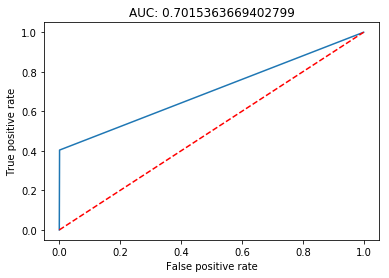

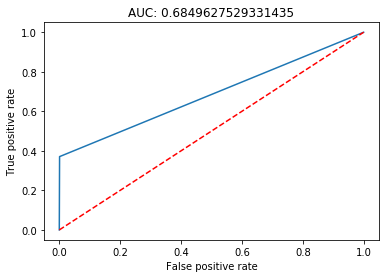

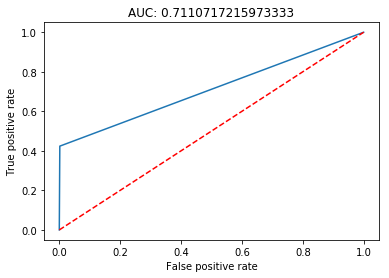

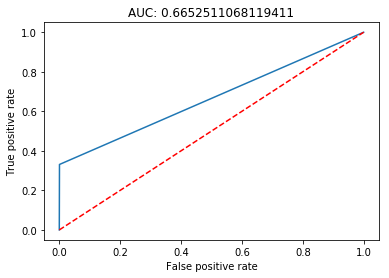

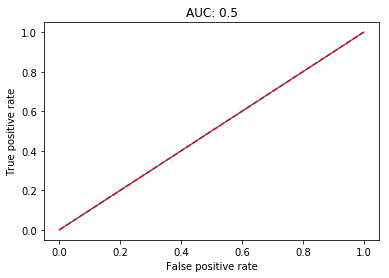

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score
for i in model:
    clf=i
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

    auc = roc_auc_score(y_test, y_pred)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='random')
    plt.title(f'AUC: {auc}')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')

#### Test Data

In [126]:
zf=zipfile.ZipFile(r"C:\Users\payal2.bhatia\Downloads\test_3BA6GZX.zip")

In [127]:
test_data=pd.read_csv(zf.open("test.csv"))

In [128]:
t2=pd.read_csv(r"C:\Users\payal2.bhatia\Downloads\test-ML hiring.csv")
t2["origination_date"].dtype

dtype('O')

In [129]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

In [130]:
NewCol=[i for i in train_data.columns if i not in test_data.columns]

In [131]:
NewCol

['loan_term_labels',
 'LTV_scale_10',
 'Risk_Level',
 'DTI_scale_10',
 'DTI_quantile_range',
 'DTI_quantile_label',
 '1st pd afterDays',
 'LTV_quantile_range',
 'LTV_quantile_label',
 0,
 1,
 2,
 3,
 4,
 5,
 6]

In [132]:
bins=[59,90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]
labels=["60-90", "90-120", "120-150", "150-180", "180-210","210-240", "240-270", "270-300", "300-330", "330-360","360-390","390-420"]

In [133]:
test_data["loan_term_labels"]=pd.cut(test_data["loan_term"], bins=bins, labels=labels)

In [134]:
test_data['LTV_scale_10'] = np.array(
                   np.round((test_data['loan_to_value'] / 10)),  
                   dtype='float')
test_data[["loan_to_value", "LTV_scale_10"]].head(3)

,loan_to_value,LTV_scale_10
0,75,8.0
1,80,8.0
2,75,8.0


In [135]:
bins=[0,6,8, 10]
labels=["Low risk", "Good Risk","High Risk"]
test_data["Risk_Level"]=pd.cut(test_data["LTV_scale_10"],bins=bins, labels=labels, right=True)

In [136]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
test_data['LTV_quantile_range'] = pd.qcut(
                                            test_data['loan_to_value'], 
                                            q=quantile_list)
test_data['LTV_quantile_label'] = pd.qcut(
                                            test_data['loan_to_value'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)


In [137]:
test_data['DTI_scale_10'] = np.array(
                   np.round((test_data['debt_to_income_ratio'] / 10)),  
                   dtype='float')

In [138]:
quantile_labels = ['under20', '20-50', '50-75', '75-100']
test_data['DTI_quantile_range'] = pd.qcut(
                                            test_data['debt_to_income_ratio'], 
                                            q=quantile_list)
test_data['DTI_quantile_label'] = pd.qcut(
                                            test_data['loan_to_value'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

In [139]:
test_data["origination_date"]=pd.to_datetime(t2["origination_date"])
test_data["origination_date"].value_counts()

2012-01-02    16423
2012-01-01    15051
2012-01-03     4392
Name: origination_date, dtype: int64

In [140]:
test_data["first_payment_date"].value_counts()

Apr-12    16551
Mar-12    14661
May-12     4510
Feb-12      144
Name: first_payment_date, dtype: int64

In [141]:
dict5={"Apr-12":"04/2012",
       "Mar-12":"03/2012",
       "May-12":"05/2012",
       "Feb-12":"02/2012"}

In [142]:
test_data["first_payment_date"]=test_data["first_payment_date"].map(dict5)

In [143]:
test_data["first_payment_date"].value_counts()

04/2012    16551
03/2012    14661
05/2012     4510
02/2012      144
Name: first_payment_date, dtype: int64

In [144]:
test_data['first_payment_date']=pd.to_datetime(test_data["first_payment_date"])
test_data["first_payment_date"].value_counts()

2012-04-01    16551
2012-03-01    14661
2012-05-01     4510
2012-02-01      144
Name: first_payment_date, dtype: int64

In [145]:
test_data["1st pd afterDays"]=test_data['first_payment_date']-test_data['origination_date']
test_data["1st pd afterDays"]

0        90 days
1        90 days
2        60 days
3        90 days
4        90 days
5        90 days
6        90 days
7        60 days
8        90 days
9        90 days
10       90 days
11       90 days
12       90 days
13       90 days
14      120 days
15       60 days
16       60 days
17       90 days
18       60 days
19       60 days
20       90 days
21       90 days
22       90 days
23       60 days
24       90 days
25       60 days
26       60 days
27       90 days
28       90 days
29      119 days
          ...   
35836    90 days
35837    60 days
35838    90 days
35839    90 days
35840    90 days
35841    60 days
35842    60 days
35843    90 days
35844    90 days
35845    60 days
35846    60 days
35847    90 days
35848    60 days
35849    90 days
35850    60 days
35851    60 days
35852    90 days
35853    90 days
35854    60 days
35855    90 days
35856    60 days
35857   120 days
35858    90 days
35859    60 days
35860    90 days
35861    91 days
35862    60 days
35863    90 da

In [146]:
test_data["1st pd afterDays"]=(test_data["1st pd afterDays"] / np.timedelta64(1, 'D')).astype(int)


In [147]:
test_data["1st pd afterDays"][1:3]

1    90
2    60
Name: 1st pd afterDays, dtype: int32

In [148]:
cat_columns=[i for i in test_data.columns if (test_data[i].dtype == "object")]
print(cat_columns)


print(test_data["DTI_quantile_label"].value_counts())


print(test_data["DTI_quantile_range"].value_counts())

print(test_data["DTI_quantile_range"].cat.codes.value_counts())

test_data["DTI_quantile_range"]=test_data["DTI_quantile_range"].cat.codes




['source', 'financial_institution', 'loan_purpose']
50-75      13630
under20     9255
20-50       8852
75-100      4129
Name: DTI_quantile_label, dtype: int64
(31.0, 39.0]     9262
(0.999, 23.0]    9212
(23.0, 31.0]     9132
(39.0, 55.0]     8260
Name: DTI_quantile_range, dtype: int64
2    9262
0    9212
1    9132
3    8260
dtype: int64


In [149]:
test_data["DTI_quantile_label"]=test_data["DTI_quantile_label"].cat.codes


In [150]:
print(test_data["loan_term_labels"].value_counts())


print(test_data["loan_term_labels"].cat.codes.value_counts())

test_data["loan_term_labels"]=test_data["loan_term_labels"].cat.codes


330-360    22372
150-180     8808
90-120      2157
210-240     2137
270-300      297
120-150       57
300-330       22
60-90         10
240-270        4
180-210        2
390-420        0
360-390        0
Name: loan_term_labels, dtype: int64
9    22372
3     8808
1     2157
5     2137
7      297
2       57
8       22
0       10
6        4
4        2
dtype: int64


In [151]:

print(test_data["Risk_Level"].value_counts())

print(test_data["Risk_Level"].cat.codes.value_counts())


test_data["Risk_Level"]=test_data["Risk_Level"].cat.codes




Good Risk    18975
Low risk     13461
High Risk     3429
Name: Risk_Level, dtype: int64
 1    18975
 0    13461
 2     3429
-1        1
dtype: int64


In [152]:
print(test_data["LTV_quantile_label"].value_counts())

print(test_data["LTV_quantile_label"].cat.codes.value_counts())


test_data["LTV_quantile_label"]=test_data["LTV_quantile_label"].cat.codes



50-75Q     13630
0-25Q       9255
25-50Q      8852
75-100Q     4129
Name: LTV_quantile_label, dtype: int64
2    13630
0     9255
1     8852
3     4129
dtype: int64


In [153]:

print(test_data["LTV_quantile_range"].value_counts())

print(test_data["LTV_quantile_range"].cat.codes.value_counts())

test_data["LTV_quantile_range"]=test_data["LTV_quantile_range"].cat.codes


(72.0, 80.0]     13630
(4.999, 57.0]     9255
(57.0, 72.0]      8852
(80.0, 97.0]      4129
Name: LTV_quantile_range, dtype: int64
2    13630
0     9255
1     8852
3     4129
dtype: int64


In [154]:
print(test_data["loan_purpose"].value_counts())

print(test_data["loan_purpose"].astype("category").cat.codes.value_counts())


test_data["loan_purpose"]=test_data["loan_purpose"].astype("category").cat.codes



A23    17892
B12     9197
C86     8777
Name: loan_purpose, dtype: int64
0    17892
1     9197
2     8777
dtype: int64


In [155]:
print(test_data["source"].value_counts())

print(test_data["source"].astype("category").cat.codes.value_counts())


test_data["source"]=test_data["source"].astype("category").cat.codes



X    19714
Y    11653
Z     4499
Name: source, dtype: int64
0    19714
1    11653
2     4499
dtype: int64


In [156]:
print(test_data["financial_institution"].value_counts())

hashed_features = fh.fit_transform(test_data['financial_institution'])
hashed_features = hashed_features.toarray()
x=pd.concat([test_data['financial_institution'], pd.DataFrame(hashed_features)], 
          axis=1)


y=x.groupby("financial_institution").apply(lambda x: x['financial_institution'].unique())

y

y=np.hstack(y)

test_data=pd.concat([test_data, pd.DataFrame(hashed_features)], axis=1)





OTHER                          15162
Browning-Hart                  10078
Swanson, Newton and Miller      2095
Edwards-Hoffman                 1530
Martinez, Duffy and Bird        1448
Miller, Mcclure and Allen        912
Nicholson Group                  596
Suarez Inc                       586
Turner, Baldwin and Rhodes       542
Cole, Brooks and Vincent         492
Richards-Walters                 462
Taylor, Hunt and Rodriguez       397
Sanchez-Robinson                 384
Sanchez, Hays and Wilkerson      289
Romero, Woods and Johnson        241
Thornton-Davis                   216
Richardson Ltd                   170
Anderson-Taylor                  152
Chapman-Mcmahon                  114
Name: financial_institution, dtype: int64


In [157]:
test_data.drop(test_data[["financial_institution"]], axis=1, inplace=True)


In [158]:
test_data["1st pd afterDays"]=pd.to_numeric(test_data["1st pd afterDays"])
test_data["1st pd afterDays"][1:3]

1    90
2    60
Name: 1st pd afterDays, dtype: int32

In [159]:
test_data["origination_date"]=pd.to_datetime(t2["origination_date"])
test_data["origination_date"].value_counts()


2012-01-02    16423
2012-01-01    15051
2012-01-03     4392
Name: origination_date, dtype: int64

In [160]:

dict3={"2012-01-01" : "Jan","2012-01-02": "Feb","2012-01-03": "Mar"}
test_data["origination_date"]=test_data["origination_date"].astype(str)

In [161]:
test_data["origination_date"]=test_data["origination_date"].map(dict3)

In [162]:
test_data["origination_date"]=le.fit_transform(test_data["origination_date"])

In [163]:

test_data["first_payment_date"].value_counts()


2012-04-01    16551
2012-03-01    14661
2012-05-01     4510
2012-02-01      144
Name: first_payment_date, dtype: int64

In [164]:
dict4={"2012-02-01": "Feb","2012-03-01": "Mar", "2012-04-01": "Apr","2012-05-01":"May"}
test_data["first_payment_date"]=test_data["first_payment_date"].astype(str).map(dict4)

In [165]:
test_data["first_payment_date"]=le.fit_transform(test_data["first_payment_date"])
test_data["first_payment_date"].value_counts()


0    16551
2    14661
3     4510
1      144
Name: first_payment_date, dtype: int64

In [166]:
train_data.columns

Index([                 'loan_id',                   'source',
                  'interest_rate',     'unpaid_principal_bal',
                      'loan_term',         'origination_date',
             'first_payment_date',            'loan_to_value',
            'number_of_borrowers',     'debt_to_income_ratio',
          'borrower_credit_score',             'loan_purpose',
              'insurance_percent', 'co-borrower_credit_score',
                 'insurance_type',                       'm1',
                             'm2',                       'm3',
                             'm4',                       'm5',
                             'm6',                       'm7',
                             'm8',                       'm9',
                            'm10',                      'm11',
                            'm12',         'loan_term_labels',
                   'LTV_scale_10',               'Risk_Level',
                   'DTI_scale_10',       'DTI_quantile_

In [167]:
test_data.columns

Index([                 'loan_id',                   'source',
                  'interest_rate',     'unpaid_principal_bal',
                      'loan_term',         'origination_date',
             'first_payment_date',            'loan_to_value',
            'number_of_borrowers',     'debt_to_income_ratio',
          'borrower_credit_score',             'loan_purpose',
              'insurance_percent', 'co-borrower_credit_score',
                 'insurance_type',                       'm1',
                             'm2',                       'm3',
                             'm4',                       'm5',
                             'm6',                       'm7',
                             'm8',                       'm9',
                            'm10',                      'm11',
                            'm12',         'loan_term_labels',
                   'LTV_scale_10',               'Risk_Level',
             'LTV_quantile_range',       'LTV_quantile_

In [168]:
train_data["origination_date"]=pd.to_numeric(train_data["origination_date"].values.astype(float))
train_data["first_payment_date"]=pd.to_numeric(train_data["first_payment_date"].values.astype(float))
train_data["1st pd afterDays"]=pd.to_numeric(train_data["1st pd afterDays"].values.astype(float))

In [169]:
pred={}
for j in models:
    for i in model:
        clf=i
        clf.fit(X_train, y_train)
        y_pred=clf.predict(test_data)
        pred[j]=y_pred

 

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5

In [170]:
Prediction=pd.DataFrame(pred)

In [171]:
Prediction.head(3)

,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,Logistic
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0


In [179]:
Prediction.any(1).sum()

0

In [205]:
from sklearn import metrics 
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {}}
    y_train=y_train["m13"]
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc}
    
    
    # ------ Class weight ------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc}

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}
        

    return results

In [208]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'non-delinquent: \n{metric}')
        ax[i*2+1].set_title(f'delinquent: \n{metric}')
    
    # AUC vis
    ax[6].set_title(f'Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

In [203]:
X.shape, Y.shape

((116058, 43), (116058, 1))

In [202]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)

In [206]:
model = DecisionTreeClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 92337), (1, 92337)]
Technique: SMOTE
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 92337), (1, 92337)]
Technique: ADASYN
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 92337), (1, 92555)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 509), (1, 509)]
Technique: NearMiss1
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 509), (1, 509)]
Technique: NearMiss2
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 509), (1, 509)]
Technique: TomekLinks
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 91990), (1, 509)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 92337), (1, 509)]
After resampling: [(0, 90816), (1, 509)]


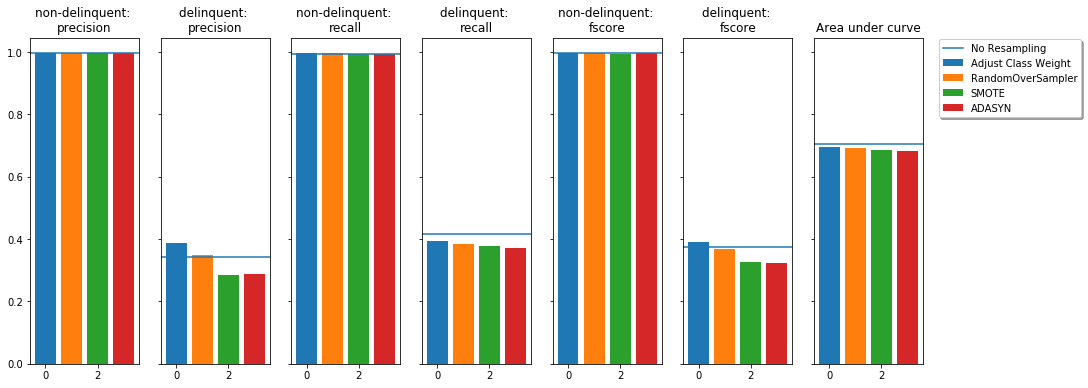

In [209]:
evaluate_method(results, 'oversample')

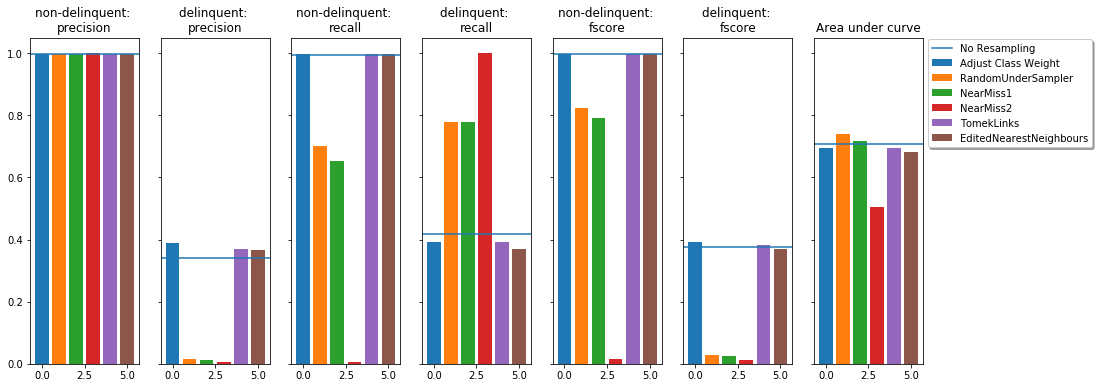

In [210]:
evaluate_method(results, 'undersample')

In [ ]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# from sklearn.svm import SVC
# model = SVC()
# results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


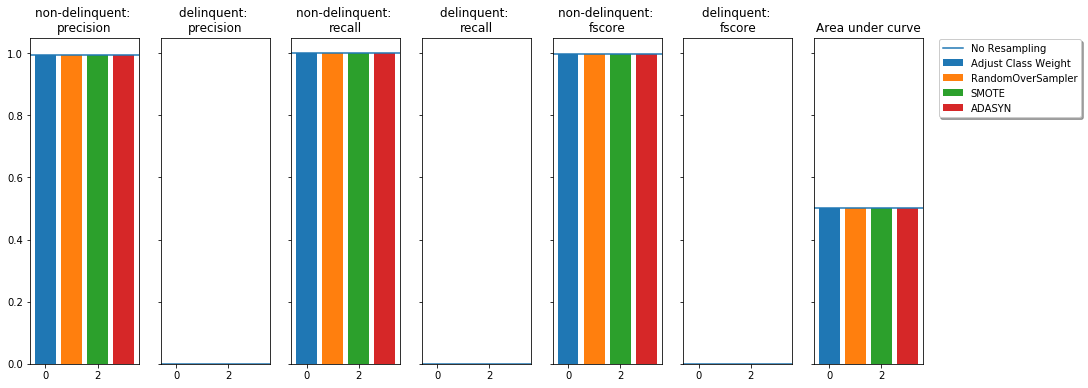

In [212]:
evaluate_method(results, 'oversample')

In [ ]:
evaluate_method(results, 'undersample')

In [ ]:
pred={}
# for j in models:
#     for i in model:
clf=model
clf.fit(X_train, y_train)
y_pred=clf.predict(test_data)
pred[model]=y_pred

account is considered to be delinquent when it is more than 30 days past the payment due date.

An account where the EMI in whole OR in part is not received within 30 days from due date will be reported as delinquent.

Payment Due Date	     Delinquency reporting	                           Payment Missed

31st Jan	Reported as in 1 – 29 Days Past Due ( Dpd) on 28th Feb reporting	1

28th Feb	Reported as in 30 – 59 Days Past Due ( Dpd) on 31st March reporting	2

31st March	Reported as in  60 – 89 ays Past Due ( Dpd) on 30th April reporting	3

30th April	Reported as in 90 – 119 Days Past Due ( Dpd) on 31st May reporting	4

31st May	Reported as in 120 – 149 Days Past Due ( Dpd) on 30th June reporting 5
https://www.kaggle.com/humananalog/xgboost-lasso/code

reciprocal

http://fmwww.bc.edu/repec/bocode/t/transint.html#targetText=Reducing%20skewness%20A%20transformation%20may,assumed%20by%20many%20statistical%20methods.
